# Bibliotecas e arquivo principal

In [ ]:
# Instala as bibliotecas necessárias
install.packages(c("tidyverse", "survival", "readxl", "flexsurv","survminer", "gridExtra", "googledrive", "patchwork", "DescTools", "nortest", "ggcorrplot", "GGally", "EWGoF", "viridis", "hrbrthemes", "muhaz", "dplyr"))

# Lista de bibliotecas necessários
pacotes <- c("tidyverse", "survival", "readxl", "flexsurv","survminer", "gridExtra", "googledrive", "patchwork", "DescTools", "nortest", "RColorBrewer", "ggcorrplot", "GGally", "EWGoF", "viridis", "hrbrthemes", "muhaz", "dplyr")

# Carrega as bibliotecas necessárias
lapply(pacotes, library, character.only = TRUE)

In [ ]:
# Ler o arquivo localmente
df_bruto <- read_excel("turnover.xlsx")

In [ ]:
# Configração para não mostrar em notação cientifíca
options(scipen = 999)

In [ ]:
# Ler o arquivo direto do google drive
# drive_auth()
# arquivo <- drive_find(pattern = "turnover.xlsx", type = "xlsx", n = 1)
# caminho_local <- drive_download(arquivo, tempfile(fileext = ".xlsx"))
# df_bruto <- read_excel(caminho_local$local_path, sheet = 1)

# Análise exploratória

## Limpeza

In [ ]:
head(df_bruto)

stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.030801,1,m,35,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
22.965092,1,m,33,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
15.934292,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
15.934292,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
8.410678,1,m,32,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
8.969199,1,f,42,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7


In [ ]:
# Limpando a base de dados
df <- df_bruto %>%

    # Renomeando algumas colunas
    rename(tempo = stag, censura = event, genero = gender, idade = age, mercado = industry, cargo = profession, recrutamento = traffic,
        treinador =  coach, genero_supervisor = head_gender, meio_transporte = way, extroversao = extraversion, independencia = independ,
        auto_controle = selfcontrol, ansiedade = anxiety) %>%

        # Verificando se há linhas duplicadas e eliminando-as
        distinct() %>%

            # Verificando valores ausentes e eliminando-os
            na.omit() %>%

                # Excluindo colunas
                select(-c(greywage, novator))

In [ ]:
head(df)

tempo,censura,genero,idade,mercado,cargo,recrutamento,treinador,genero_supervisor,meio_transporte,extroversao,independencia,auto_controle,ansiedade
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7.030801,1,m,35,Banks,HR,rabrecNErab,no,f,bus,6.2,4.1,5.7,7.1
22.965092,1,m,33,Banks,HR,empjs,no,m,bus,6.2,4.1,5.7,7.1
15.934292,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,bus,6.2,6.2,2.6,4.8
15.934292,1,f,35,PowerGeneration,HR,rabrecNErab,no,m,bus,5.4,7.6,4.9,2.5
8.410678,1,m,32,Retail,Commercial,youjs,yes,f,bus,3.0,4.1,8.0,7.1
8.969199,1,f,42,manufacture,HR,empjs,yes,m,bus,6.2,6.2,4.1,5.6


## Análise univariada

### Quantitativas

In [ ]:
# Função para calcular as estatísticas descritivas
estatisticas <- function(df_coluna) {
  # Medidas de posição
  media <- mean(df_coluna)
  mediana <- median(df_coluna)

  # Medidas de dispersão
  variancia <- var(df_coluna)
  dp <- sqrt(variancia)
  dam <- mean(abs(df_coluna - mean(df_coluna)))
  damm <- mad(df_coluna)
  q1 <- quantile(df_coluna, 0.25)
  q3 <- quantile(df_coluna, 0.75)
  aiq <- q3 - q1

  # Medidas de tendência
  minimo <- min(df_coluna)
  maximo <- max(df_coluna)

  # Retorna um vetor com as estatísticas calculadas
  return(c("Média" = media, "Mediana" = mediana, "Variância" = variancia,"Desvio Padrão" = dp,
    "Desvio Absoluto da Média" = dam,"Desvio Absoluto da Mediana" = damm, "Primeiro Quartil" = q1,
    "Terceiro Quartil" = q3,"Intervalo Interquartil (AIQ)" = aiq, "Mínimo" = minimo,"Máximo" = maximo)
    )
}

In [ ]:
# Obtendo as estatísticas descritivas das variáveis quantitativas
lista_variaveis_quantitativas <- c("tempo", "idade", "extroversao", "independencia", "auto_controle", "ansiedade")

# Calculando as estatíticas para cada variável numérica
matriz_estatisticas <- sapply(df[lista_variaveis_quantitativas], estatisticas)

# Convertendo a matriz para um data frame para melhor visualização dos resultados
df_estatisticas <- as.data.frame(matriz_estatisticas)

# Visualizar o data frame
View(df_estatisticas)

,tempo,idade,extroversao,independencia,auto_controle,ansiedade
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Média,36.7018024,31.024734,5.589606,5.474462,5.607527,5.666667
Mediana,24.4435318,30.000000,5.400000,5.500000,5.700000,5.600000
Variância,1167.7971969,48.623815,3.449937,2.897311,3.943082,2.927641
Desvio Padrão,34.1730478,6.973078,1.857401,1.702149,1.985720,1.711035
Desvio Absoluto da Média,26.3170003,5.668998,1.509291,1.363341,1.633326,1.372162
Desvio Absoluto da Mediana,24.9880509,7.413000,2.372160,2.075640,2.223900,2.223900
Primeiro Quartil.25%,11.7207392,26.000000,4.600000,4.100000,4.100000,4.800000
Terceiro Quartil.75%,51.6221766,36.000000,7.000000,6.900000,7.200000,7.100000
Intervalo Interquartil (AIQ).75%,39.9014374,10.000000,2.400000,2.800000,3.100000,2.300000


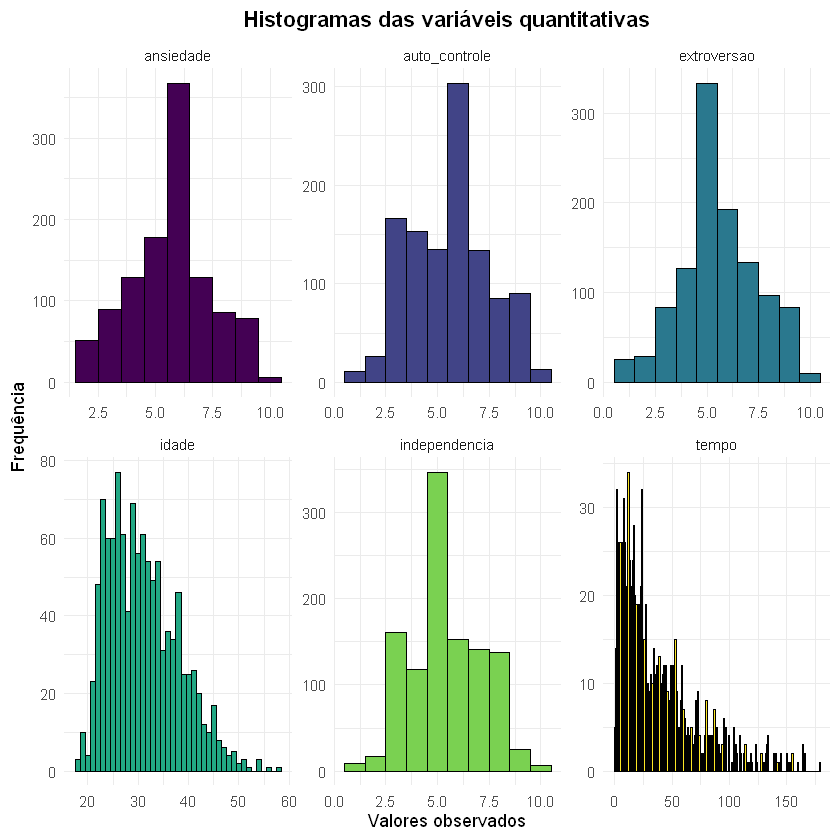

In [ ]:
# Histograma das variáveis quantitativas

# Crinado um data frame no formato long para gráfico
df_longo_hist <- bind_rows(lapply(lista_variaveis_quantitativas, function(var) {
  data.frame(Variavel = var, Valor = df[[var]])
}))


# Gráfico
hist_plot <- ggplot(df_longo_hist, aes(x = Valor)) +

    # Histograma para cada variável
    geom_histogram(aes(fill = Variavel), color = "black", binwidth = 1.0, show.legend = FALSE) +

    # Paleta de cores
    scale_fill_viridis_d() + facet_wrap(~ Variavel, scales = "free") +

    # Títulos
    labs(title = "Histogramas das variáveis quantitativas", x = "Valores observados", y = "Frequência") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(plot.title = element_text(hjust = 0.5, face = "bold")); hist_plot

### Qualitativas

In [ ]:
# Tabelas de frequência

# Obtendo as estatísticas descritivas das variáveis qualitativas
lista_variaveis_qualitativas <- c("censura", "genero", "mercado", "cargo", "recrutamento", "treinador", "genero_supervisor", "meio_transporte")

# Loop para frequência absoluta e relativa das variáveis qualitativas
for (variavel in lista_variaveis_qualitativas) {

    # Obtem a frequência absoluta
    tabela_absoluta <- table(df[[variavel]])

    # Obtem a frequência relativa
    tabela_relativa <- prop.table(tabela_absoluta)

    # Colocando em porcentagem e arredondando para duas casa decimais
    tabela_percentual <- round(tabela_relativa * 100, 2)

    # Agrupa os vetores e um data frame
    tabela_completa <- cbind(
        "Frequência absoluta" = tabela_absoluta,
        "Frequência relativa (%)" = tabela_percentual
    )

    # Exibe a tabela final
    View(tabela_completa)
}

,Frequência absoluta,Frequência relativa (%)
0,556,49.82
1,560,50.18


,Frequência absoluta,Frequência relativa (%)
f,841,75.36
m,275,24.64


,Frequência absoluta,Frequência relativa (%)
Agriculture,15,1.34
Banks,112,10.04
Building,41,3.67
Consult,74,6.63
etc,94,8.42
HoReCa,11,0.99
IT,122,10.93
manufacture,143,12.81
Mining,24,2.15
Pharma,19,1.70


,Frequência absoluta,Frequência relativa (%)
Accounting,10,0.90
BusinessDevelopment,27,2.42
Commercial,23,2.06
Consult,25,2.24
Engineer,15,1.34
etc,37,3.32
FALSE,17,1.52
HR,745,66.76
IT,74,6.63
Law,7,0.63


,Frequência absoluta,Frequência relativa (%)
advert,33,2.96
empjs,247,22.13
friends,116,10.39
KA,65,5.82
rabrecNErab,206,18.46
recNErab,38,3.41
referal,95,8.51
youjs,316,28.32


,Frequência absoluta,Frequência relativa (%)
my head,311,27.87
no,674,60.39
yes,131,11.74


,Frequência absoluta,Frequência relativa (%)
f,541,48.48
m,575,51.52


,Frequência absoluta,Frequência relativa (%)
bus,676,60.57
car,325,29.12
foot,115,10.30


Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead."
Warning message:
"Removed 14 rows containing missing values or values outside the scale range
(`geom_bar()`)."
Warning message:
"Removed 14 rows containing missing values or values outside the scale range
(`geom_text()`)."


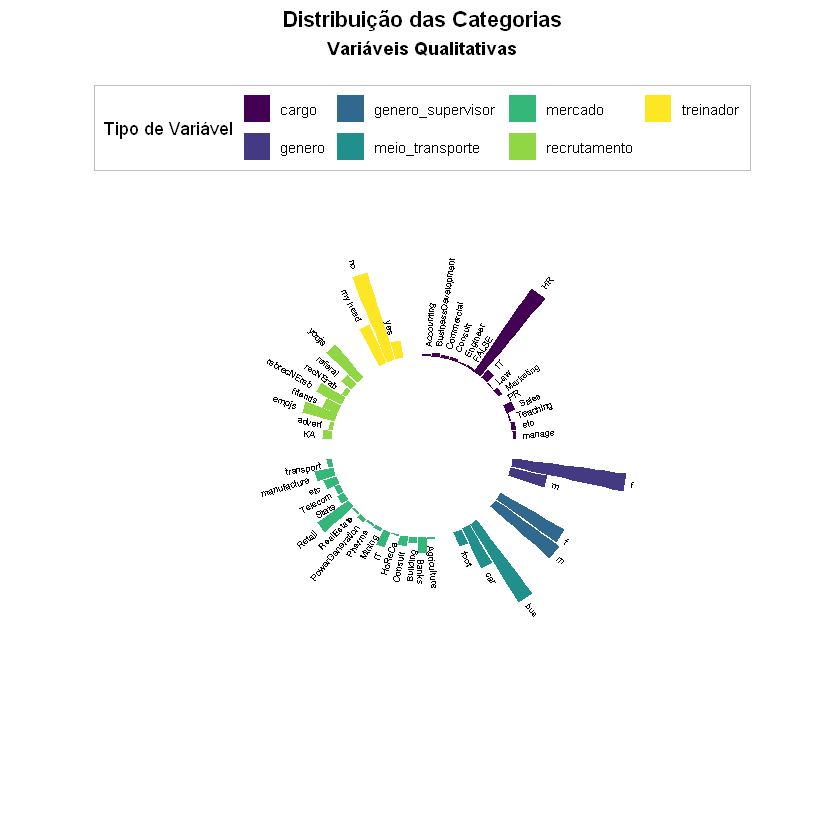

In [ ]:
# Gráfico de barras

# Filtrando as variáveis categóricas
df_para_plot <- df %>%

    # Selecionando as colunas de variáveis categóricas
    select(genero, meio_transporte, treinador, mercado, cargo, recrutamento, genero_supervisor) %>%

        # Transformando em formato longo
        pivot_longer(cols = everything(), names_to = "Tipo_Variavel", values_to = "Categoria")

# Contagem  das quantidade
df_contagens <- df_para_plot %>%

    # Contagem
    count(Tipo_Variavel, Categoria, name = "value")

# Barras vazias
empty_bar <- 2
to_add <- df_contagens %>%

    # Agrupando pela variável
    group_by(Tipo_Variavel) %>%

        # Calculo das contagens
        summarise(count=n()) %>%

            # Criando a coluna para barras vazias
            mutate(empty_to_add = empty_bar) %>%

                # Selcionando as colunas
                select(Tipo_Variavel, empty_to_add)

# Dataframe vazio para barras vaias
to_add_df <- data.frame( matrix(NA, sum(to_add$empty_to_add), ncol(df_contagens)) )
colnames(to_add_df) <- colnames(df_contagens)

# Preenchendo os nomes dos grupos nas barras vazias
to_add_df$Tipo_Variavel <- rep(to_add$Tipo_Variavel, to_add$empty_to_add)

# Mescando os dataframes (Com valores e vazio)
data <- rbind(df_contagens, to_add_df)
data <- data %>%

    # Mescalor pelo tipo da variável
    arrange(Tipo_Variavel) %>%

        # Adicionando coluna de ID
        mutate(id = row_number())

# Dataframe para os rótulos e calcula os ângulos
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5) / number_of_bar
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)

# Gráfico
bar_plot <- ggplot(data, aes(x = as.factor(id), y = value, fill = Tipo_Variavel)) +

    # Barras para as variável qualitativa
    geom_bar(stat = "identity") +

    # Paleta de cores
    scale_fill_viridis_d() +

    # Área de gráfico
    scale_y_continuous(expand = c(0.75, 0)) +

    # Arredondamento do centro
    coord_polar() +

    # Tema
    theme_minimal() +

    # Títulos das barras
    geom_text(data = label_data, aes(x = id, y = value + 50, label = Categoria, hjust = hjust), color = "black", size = 2.0, angle = label_data$angle, inherit.aes = FALSE) +

    # Tírulos do gráfico
    labs(title = "Distribuição das Categorias", subtitle = "Variáveis Qualitativas", fill = "Tipo de Variável") +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5, face = "bold"),

        # Legenda
        legend.position = c(0.5, 0.92),
        legend.direction = "horizontal",
        legend.justification = "center",
        legend.title = element_text(hjust = 0.5),
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),

        # Eixos
        axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank()); bar_plot

### Outliers

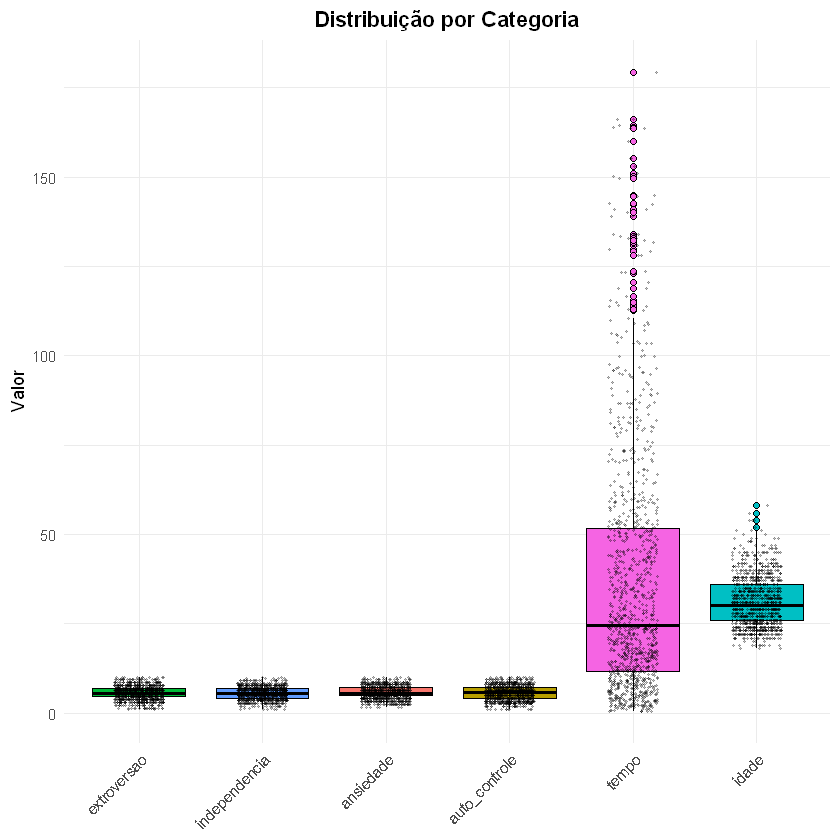

In [ ]:
# Boxplot para analise de outliers
ggplot(data = df_longo_hist, aes(x = reorder(Variavel, Valor, FUN = median), y = Valor, fill = Variavel)) +

    # Boxplot
    geom_boxplot(outlier.shape = 21, color = "black") +

    # Pontos de dispersãao
    geom_jitter(color = "black", size = 0.6, alpha = 0.25, width = 0.2) +

    # Título
    labs(x = NULL, y = "Valor", title = "Distribuição por Categoria") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),

        # Legenda
        legend.position = "none",

        # Eixo
        axis.text.x = element_text(angle = 45, hjust = 1))


## Análise multivariada

### Quantitativa versus Quantitativa

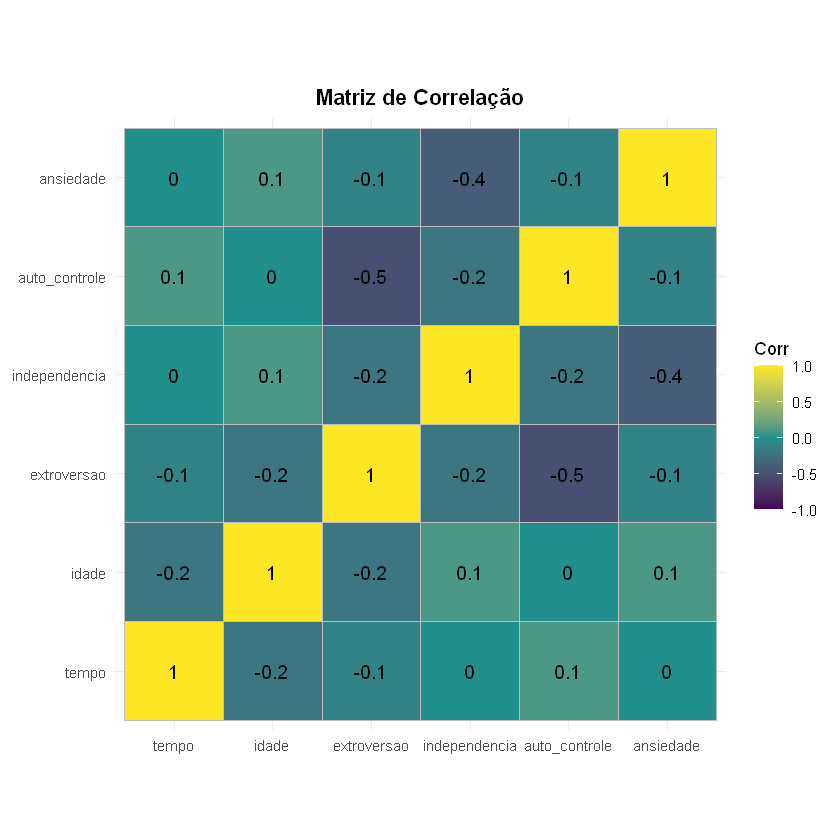

In [ ]:
# Matriz de correlação entre variáveis quantitativas

# Cria dataframe com as variáveis quantitativas
df_para_corr <- df %>%

    # Selecione as colunas quantitativas
    select(tempo, idade, extroversao, independencia, auto_controle, ansiedade)

# Cálculo das correlações
corr <- round(cor(df_para_corr), 1)

# Gráfico
corr_plot <- ggcorrplot(corr, lab=TRUE, colors = viridis(3)) +

    # Título
    labs(title = "Matriz de Correlação", x = NULL, y = NULL) +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold")); corr_plot

`geom_smooth()` using formula = 'y ~ x'


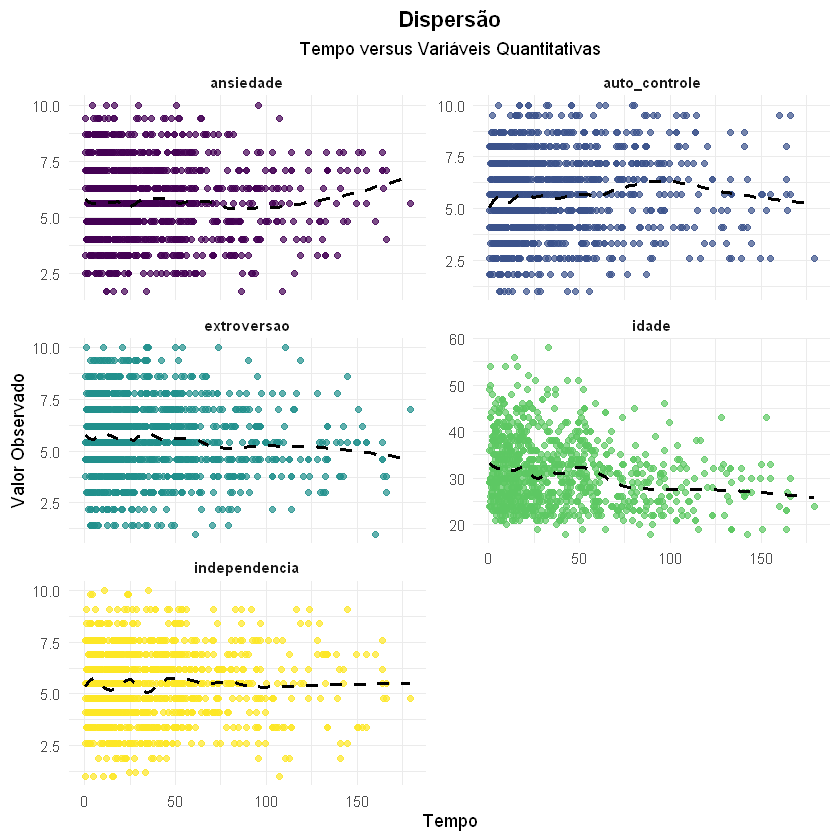

In [ ]:
# Dispersão em relação ao tempo

# Data frame em formato longo
df_longo_disp <- df %>%

    # Selecione as colunas quantitativas
    select(tempo, idade, extroversao, independencia, auto_controle, ansiedade) %>%

        # Pivotando ao tempo
        pivot_longer(cols = -tempo, names_to = "Variavel", values_to = "Valor")

# Gráfico
disp_plot <- ggplot(df_longo_disp, aes(x = tempo, y = Valor, color = Variavel)) +

    # Dispersão
    geom_point(alpha = 0.7, show.legend = FALSE) +

    # Linha de tendência
    geom_smooth(method = "loess", span = 0.3, se = FALSE, linetype = "dashed", color = "black", alpha = 0.5) +

    # Palete
    scale_color_viridis_d() +

    # Layout de subplots
    facet_wrap(~ Variavel, scales = "free_y", nrow = 3) +

    # Títulos
    labs(title = "Dispersão", subtitle = "Tempo versus Variáveis Quantitativas", x = "Tempo", y = "Valor Observado") +

    # Tema
    theme_minimal() +

    theme(

        # Título principal
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Título subplots
        strip.text = element_text(face = "bold", hjust = 0.5)); disp_plot

`geom_smooth()` using formula = 'y ~ x'


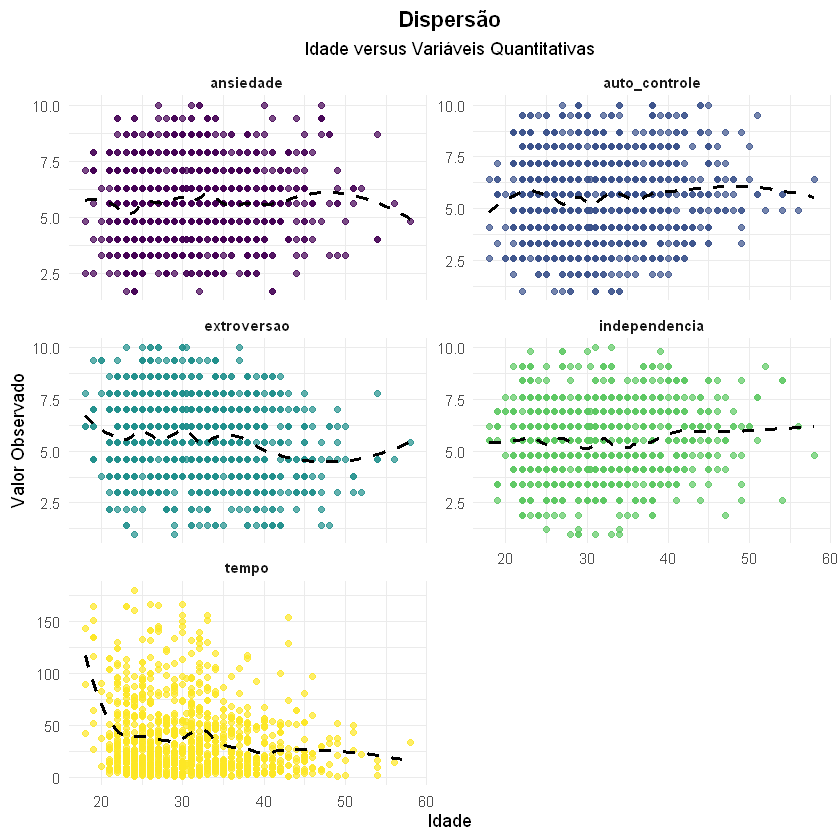

In [ ]:
# Dispersão em relação a idade

# Data frame em formato longo
df_longo_disp <- df %>%

    # Selecione as colunas quantitativas
    select(tempo, idade, extroversao, independencia, auto_controle, ansiedade) %>%

        # Pivotando ao idade
        pivot_longer(cols = -idade, names_to = "Variavel", values_to = "Valor")

# Gráfico
disp_plot <- ggplot(df_longo_disp, aes(x = idade, y = Valor, color = Variavel)) +

    # Dispersão
    geom_point(alpha = 0.7, show.legend = FALSE) +

    # Linha de tendência
    geom_smooth(method = "loess", span = 0.3, se = FALSE, linetype = "dashed", color = "black", alpha = 0.5) +

    # Palete
    scale_color_viridis_d() +

    # Layout de subplots
    facet_wrap(~ Variavel, scales = "free_y", nrow = 3) +

    # Títulos
    labs(title = "Dispersão", subtitle = "Idade versus Variáveis Quantitativas", x = "Idade", y = "Valor Observado") +

    # Tema
    theme_minimal() +

    theme(

        # Título principal
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Título subplots
        strip.text = element_text(face = "bold", hjust = 0.5)); disp_plot

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`geom_smooth()` using formula = 'y ~ x'


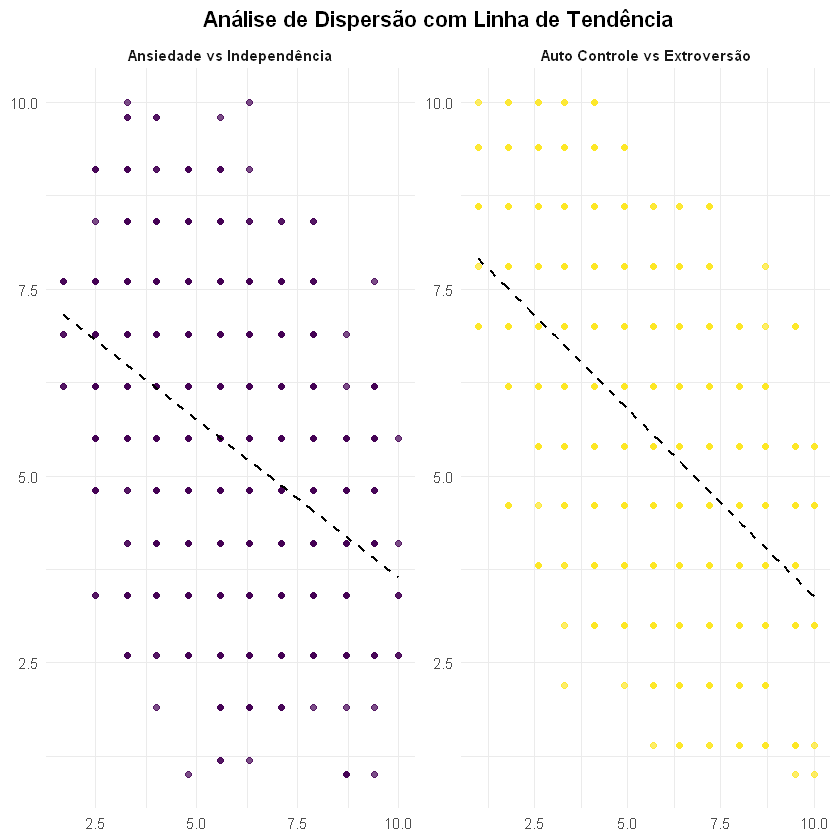

In [ ]:
# Dispersão entre Ansiedade vs Independência e Auto Controle vs Extroversão

# Data frame filtrado os dados para Auto Controle vs Extroversão
df_ace <- df %>%

    # Seleciona as colunas
    select(x_val = auto_controle, y_val = extroversao) %>%

        # Adicionar a coluna com o nome das variáveis para dispersão
        mutate(Grupo = "Auto Controle vs Extroversão")

# Data frame filtrado os dados para Ansiedade vs Independência
df_ai <- df %>%

    # Seleciona as colunas
    select(x_val = ansiedade, y_val = independencia) %>%

        # Adicionar a coluna com o nome das variáveis para dispersão
        mutate(Grupo = "Ansiedade vs Independência")

# Combinar os dois data frames em um só
df_combinado <- bind_rows(df_ace, df_ai)

# Gráfico
grafico_disp_duplo <- ggplot(df_combinado, aes(x = x_val, y = y_val, color = Grupo)) +

    # Dispersão
    geom_point(alpha = 0.7, show.legend = FALSE) +

    # Linha de tendência
    geom_smooth(method = "lm", se = FALSE, linetype = "dashed", size = 0.8, color = "black", show.legend = FALSE) +

    # Paleta
    scale_color_viridis_d() +

    # Layout de subplots
    facet_wrap(~ Grupo, scales = "free") +

    # Títulos
    labs(title = "Análise de Dispersão com Linha de Tendência", x = NULL, y = NULL) +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        strip.text = element_text(face = "bold", hjust = 0.5),

        # Legenda
        legend.position = "none"); grafico_disp_duplo

### Qualitativa versus Quantitativa

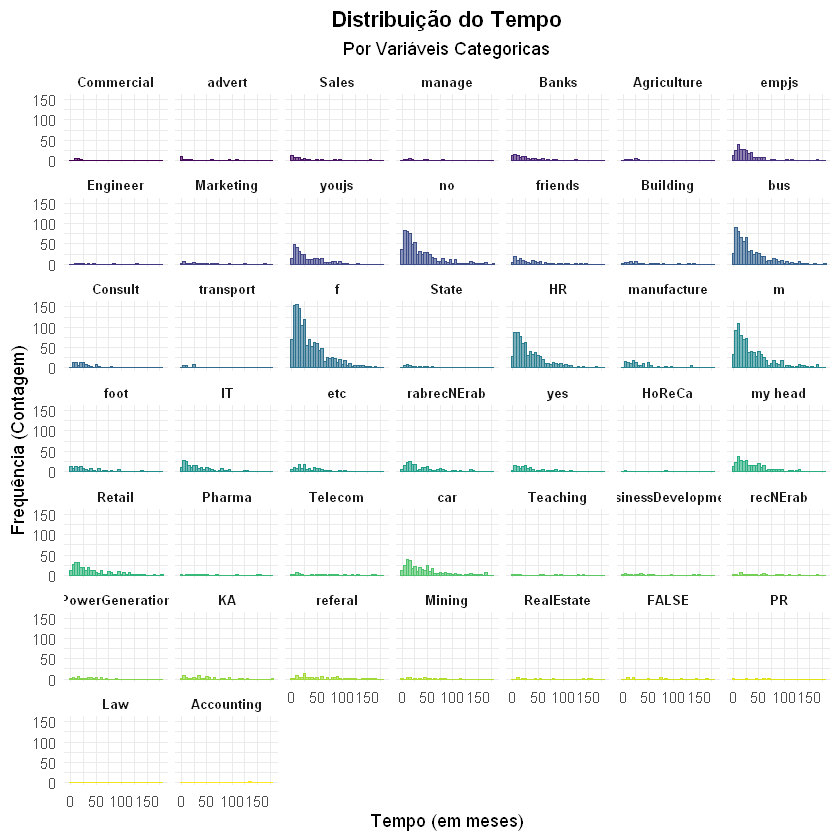

In [ ]:
# Histograma do tempo por variável categórica

# Criando um data frame com formato longo
df_longo_histo_tempo_micro <- bind_rows(lapply(c("genero", "genero_supervisor", "meio_transporte", "treinador", "mercado", "cargo", "recrutamento"), function(var) {
  data.frame(tempo = df$tempo, Tipo_Variavel = var, Categoria = df[[var]])
}))


# Criando a coluna de categoria ordenada para os subplots
faceted_histogram_tempo <- df_longo_histo_tempo_micro %>%

    # Cria as colunas para o gráfico
    mutate(Categoria_Ordenada = fct_reorder(str_c(Categoria), tempo)) %>%

        # Gráfico
        ggplot(aes(x = tempo, color = Categoria_Ordenada, fill = Categoria_Ordenada)) +

            # Histograma
            geom_histogram(alpha = 0.6, binwidth = 5, show.legend = FALSE) +

            # Paleta
            scale_fill_viridis(discrete = TRUE) +
            scale_color_viridis(discrete = TRUE) +

            # Títulos
            labs(title = "Distribuição do Tempo", subtitle = "Por Variáveis Categoricas", x = "Tempo (em meses)", y = "Frequência (Contagem)") +

            # Layout para subplot
            facet_wrap(~Categoria_Ordenada) +

            # Tema
            theme_minimal() +

            # Personalização
            theme(

                # Título
                plot.title = element_text(hjust = 0.5, face = "bold"),
                plot.subtitle = element_text(hjust = 0.5),

                # Legenda
                legend.position = "none",
                panel.spacing = unit(0.3, "lines"),
                strip.text.x = element_text(size = 8, face = "bold")); faceted_histogram_tempo

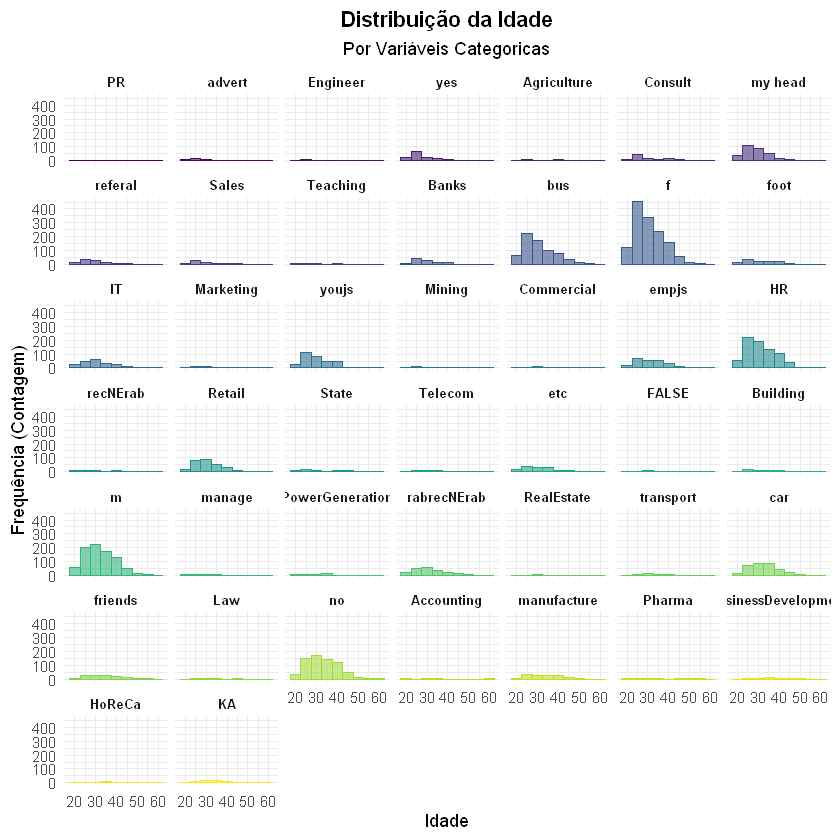

In [ ]:
# Histograma da idade por variável categórica

# Criando um data frame com formato longo
df_longo_histo_idade_micro <- bind_rows(lapply(c("genero", "meio_transporte", "treinador", "mercado", "cargo", "recrutamento", "genero_supervisor"), function(var) {
  data.frame(idade = df$idade, Tipo_Variavel = var, Categoria = df[[var]])
}))

# Criando a coluna de categoria ordenada para os subplots
faceted_histogram_idade <- df_longo_histo_idade_micro %>%

    # Cria as colunas para o gráfico
    mutate(Categoria_Ordenada = fct_reorder(str_c(Categoria), idade)) %>%

        # Gráfico
        ggplot(aes(x = idade, color = Categoria_Ordenada, fill = Categoria_Ordenada)) +

            # Histograma
            geom_histogram(alpha = 0.6, binwidth = 5, show.legend = FALSE) +

            # Paleta
            scale_fill_viridis(discrete = TRUE) +
            scale_color_viridis(discrete = TRUE) +

            # Títulos
            labs(title = "Distribuição da Idade", subtitle = "Por Variáveis Categoricas", x = "Idade", y = "Frequência (Contagem)") +

            # Layout para subplot
            facet_wrap(~Categoria_Ordenada) +

            theme_minimal() +
            theme(

                # Título
                plot.title = element_text(hjust = 0.5, face = "bold"),
                plot.subtitle = element_text(hjust = 0.5),

                # Legenda
                legend.position = "none",
                panel.spacing = unit(0.3, "lines"),
                strip.text.x = element_text(size = 8, face = "bold")); faceted_histogram_idade

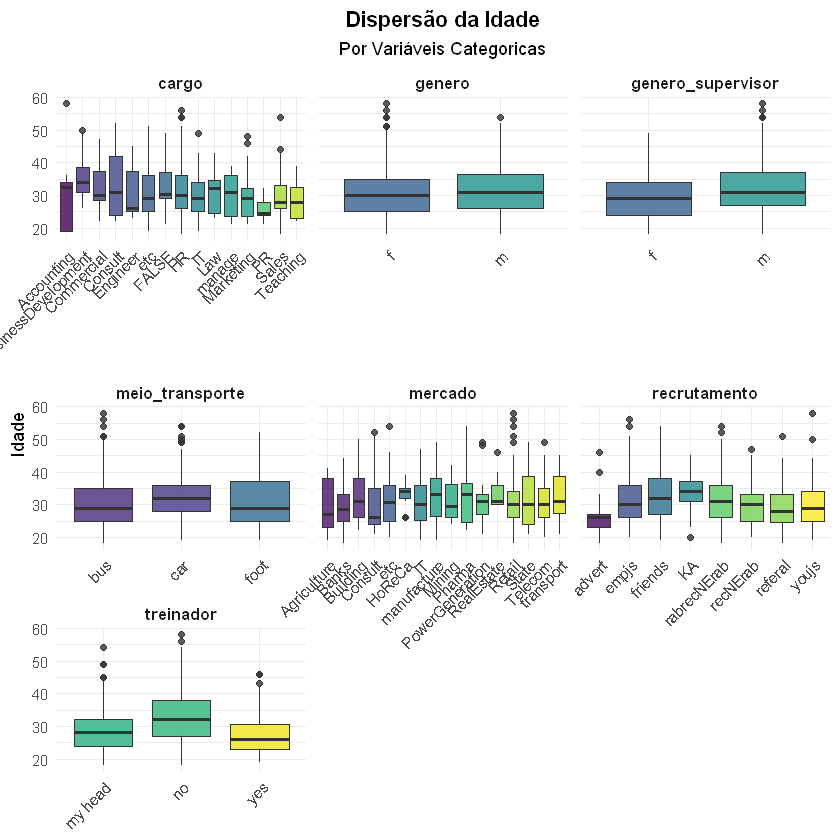

In [ ]:
# Dispersão da idade por cada variável categorica

# Gráfico
faceted_boxplot <- ggplot(data = df_longo_histo_idade_micro, aes(x = Categoria, y = idade, fill = Categoria)) +

    # Boxplot
    geom_boxplot(show.legend = FALSE, alpha = 0.8) +

    # Layout de subplots
    facet_wrap(~ Tipo_Variavel, scales = "free_x") +

    # Paleta
    scale_fill_viridis(discrete = TRUE) +

    # Títulos
    labs(title = "Dispersão da Idade", subtitle = "Por Variáveis Categoricas", x = NULL, y = "Idade") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Legenda
        legend.position = "none",
        panel.spacing = unit(0.5, "lines"),
        strip.text.x = element_text(size = 10, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)); faceted_boxplot

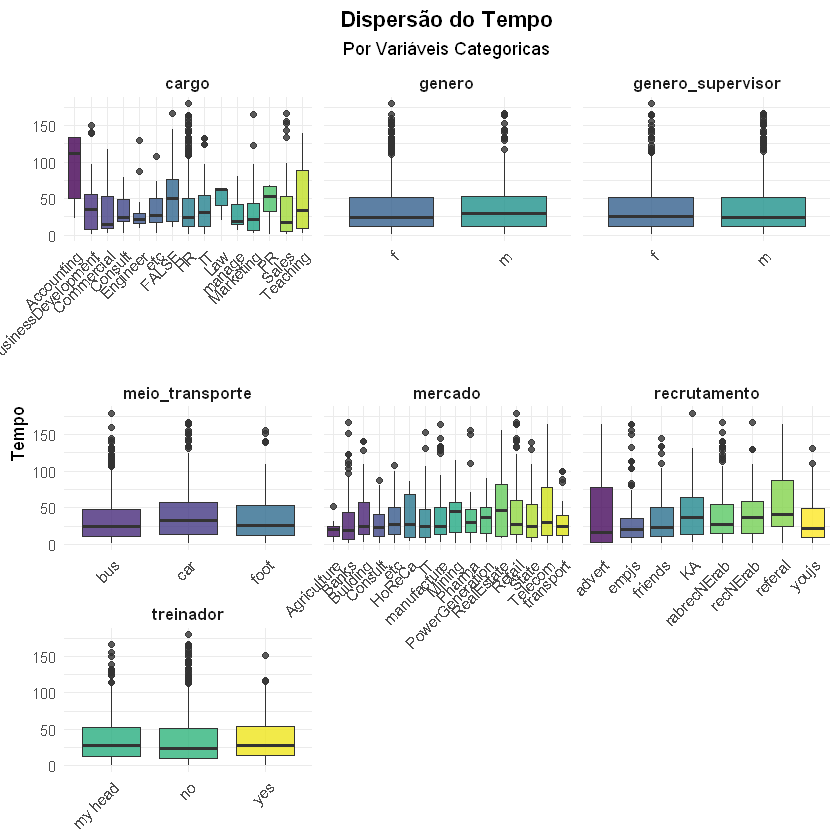

In [ ]:
# Dispersão do tempo por cada variável categorica

# Gráfico
faceted_boxplot <- ggplot(data = df_longo_histo_tempo_micro, aes(x = Categoria, y = tempo, fill = Categoria)) +

    # Boxplot
    geom_boxplot(show.legend = FALSE, alpha = 0.8) +

    # Layout subplots
    facet_wrap(~ Tipo_Variavel, scales = "free_x") +

    # Títulos
    labs(title = "Dispersão do Tempo", subtitle = "Por Variáveis Categoricas", x = NULL, y = "Tempo") +

    # Paleta
    scale_fill_viridis(discrete = TRUE) +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Legenda
        legend.position = "none",
        panel.spacing = unit(0.5, "lines"),
        strip.text.x = element_text(size = 10, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)); faceted_boxplot

In [ ]:
# Estatisticas descritivas para o tempo e idade agrupados por treinamento

# Para a variável "tempo"
estatisticas_tempo_por_genero <- df %>%

    # Agrupando por meio de transporte
    group_by(genero) %>%

    # Calcula as estatísticas descritivas do tempo para cada grupo
        summarise(stats_vetor = list(estatisticas(tempo))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Para a variável "idade"
estatisticas_idade_por_genero <- df %>%

    # Agrupando por mercado
    group_by(genero) %>%

        # Calcula as estatísticas descritivas da idade para cada grupo
        summarise(stats_vetor = list(estatisticas(idade))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Visualizando os resultados
print("Estatísticas para TEMPO por Genêro:")
View(estatisticas_tempo_por_genero)
print("Estatísticas para IDADE por Genêro:")
View(estatisticas_idade_por_genero)

[1] "Estatísticas para TEMPO por Genêro:"


genero,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f,35.86570,23.98357,1119.272,33.45552,25.95303,24.30612,11.49897,51.0883,39.58932,0.4271047,179.4497
m,39.25875,28.84600,1312.115,36.22312,27.27007,28.64127,12.33676,53.4538,41.11704,0.3942505,166.2752


[1] "Estatísticas para IDADE por Genêro:"


genero,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f,30.78550,30,47.38755,6.883861,5.593371,7.413,25,35.0,10.0,18,58
m,31.75636,31,51.87838,7.202665,5.840979,7.413,26,36.5,10.5,18,54


In [ ]:
# Estatisticas descritivas para o tempo e idade agrupados por treinamento

# Para a variável "tempo"
estatisticas_tempo_por_genero_lider <- df %>%

    # Agrupando por meio de transporte
    group_by(genero_supervisor) %>%

    # Calcula as estatísticas descritivas do tempo para cada grupo
        summarise(stats_vetor = list(estatisticas(tempo))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Para a variável "idade"
estatisticas_idade_por_genero_lider <- df %>%

    # Agrupando por mercado
    group_by(genero_supervisor) %>%

        # Calcula as estatísticas descritivas da idade para cada grupo
        summarise(stats_vetor = list(estatisticas(idade))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Visualizando os resultados
print("Estatísticas para TEMPO por Genêro Líder:")
View(estatisticas_tempo_por_genero_lider)
print("Estatísticas para IDADE por Genêro Líder:")
View(estatisticas_idade_por_genero_lider)

[1] "Estatísticas para TEMPO por Genêro Líder:"


genero_supervisor,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f,36.82173,26.08624,1126.255,33.55972,25.97840,26.30321,11.95893,51.74538,39.78645,0.4271047,179.4497
m,36.58896,24.21355,1208.887,34.76905,26.62984,24.25741,11.13758,51.15400,40.01643,0.3942505,166.2752


[1] "Estatísticas para IDADE por Genêro Líder:"


genero_supervisor,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f,29.61553,29,41.46821,6.439581,5.317096,7.413,24,34,10,18,49
m,32.35061,31,51.80758,7.197748,5.845906,7.413,27,37,10,18,58


In [ ]:
# Estatisticas descritivas para o tempo e idade agrupados por treinamento

# Para a variável "tempo"
estatisticas_tempo_por_treinamento <- df %>%

    # Agrupando por meio de transporte
    group_by(treinador) %>%

    # Calcula as estatísticas descritivas do tempo para cada grupo
        summarise(stats_vetor = list(estatisticas(tempo))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Para a variável "idade"
estatisticas_idade_por_treinamento <- df %>%

    # Agrupando por mercado
    group_by(treinador) %>%

        # Calcula as estatísticas descritivas da idade para cada grupo
        summarise(stats_vetor = list(estatisticas(idade))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Visualizando os resultados
print("Estatísticas para TEMPO por Treinamento:")
View(estatisticas_tempo_por_treinamento)
print("Estatísticas para IDADE por Treinamento:")
View(estatisticas_idade_por_treinamento)

[1] "Estatísticas para TEMPO por Treinamento:"


treinador,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
my head,37.84266,27.56468,1034.1687,32.15849,25.01839,26.30321,12.99384,52.45175,39.45791,0.4928131,166.0780
no,36.15820,23.45791,1279.1101,35.76465,27.32953,24.69579,10.53799,50.72690,40.18891,0.3942505,179.4497
yes,36.79019,27.36756,923.5041,30.38921,23.91351,24.35483,13.96304,53.63450,39.67146,0.4271047,150.9979


[1] "Estatísticas para IDADE por Treinamento:"


treinador,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
my head,28.82444,28,34.57540,5.880085,4.636078,5.9304,24,32.00000,8.000000,18,54
no,32.72819,32,50.20284,7.085396,5.799509,7.4130,27,38.00000,11.000000,18,58
yes,27.48397,26,35.43753,5.952943,4.758071,4.4478,23,30.70017,7.700166,19,46


In [ ]:
# Estatisticas descritivas para o tempo e idade agrupados por meio de transporte

# Para a variável "tempo"
estatisticas_tempo_por_meio_transporte <- df %>%

    # Agrupando por meio de transporte
    group_by(meio_transporte) %>%

    # Calcula as estatísticas descritivas do tempo para cada grupo
        summarise(stats_vetor = list(estatisticas(tempo))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Para a variável "idade"
estatisticas_idade_por_meio_transporte <- df %>%

    # Agrupando por mercado
    group_by(meio_transporte) %>%

        # Calcula as estatísticas descritivas da idade para cada grupo
        summarise(stats_vetor = list(estatisticas(idade))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Visualizando os resultados
print("Estatísticas para TEMPO por Meio de Transporte:")
View(estatisticas_tempo_por_meio_transporte)
print("Estatísticas para IDADE por Meio de Transporte:")
View(estatisticas_idade_por_meio_transporte)

[1] "Estatísticas para TEMPO por Meio de Transporte:"


meio_transporte,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bus,33.84173,23.85216,978.0513,31.27381,24.18999,23.74595,10.51335,48.19713,37.68378,0.4271047,179.4497
car,42.42368,32.49281,1479.3966,38.46292,29.51043,30.19998,13.27310,57.65914,44.38604,0.5256674,166.2752
foot,37.34352,25.98768,1283.9232,35.83187,27.67657,27.27740,11.86037,53.70021,41.83984,0.3942505,155.3676


[1] "Estatísticas para IDADE por Meio de Transporte:"


meio_transporte,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bus,30.48403,29,51.30505,7.162754,5.808130,7.4130,25,35,10,18,58
car,32.27077,32,40.81535,6.388689,4.981472,5.9304,28,36,8,19,54
foot,30.68174,29,49.51501,7.036690,6.062515,8.8956,25,37,12,19,52


In [ ]:
# Estatisticas descritivas para o tempo e idade agrupados por mercado

# Para a variável "tempo"
estatisticas_tempo_por_mercado <- df %>%

    # Agrupando por mercado
    group_by(mercado) %>%

    # Agrupando por mercado
        summarise(stats_vetor = list(estatisticas(tempo))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Para a variável "idade"
estatisticas_idade_por_mercado <- df %>%

    # Agrupando por mercado
    group_by(mercado) %>%

        # Agrupando por mercado
        summarise(stats_vetor = list(estatisticas(idade))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Visualizando os resultados
print("Estatísticas para TEMPO por Mercado:")
View(estatisticas_tempo_por_mercado)
print("Estatísticas para IDADE por Mercado:")
View(estatisticas_idade_por_mercado)

[1] "Estatísticas para TEMPO por Mercado:"


mercado,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agriculture,19.40808,19.81109,155.2269,12.45901,9.427552,11.49548,10.266940,23.98357,13.71663,2.7597536,51.87680
Banks,32.17102,19.12115,1166.3781,34.15228,25.874324,23.03966,6.940452,42.91581,35.97536,1.4127310,166.07803
Building,36.45856,23.81930,1378.2635,37.12497,27.901257,18.55838,12.813142,57.10062,44.28747,2.3655031,140.94456
Consult,27.49231,22.68583,428.8753,20.70930,16.379047,18.82628,10.570842,40.77207,30.20123,1.7412731,87.68789
HoReCa,38.63356,27.56468,1157.8093,34.02660,29.732788,36.04514,9.100616,68.13963,59.03901,3.2525667,86.60370
IT,31.95449,24.06571,887.2947,29.78749,22.916676,24.96370,9.034908,48.25462,39.21971,0.3942505,153.10062
Mining,41.32375,44.35318,874.8062,29.57712,24.147045,41.06224,15.581109,57.74127,42.16016,0.6899384,114.13552
Pharma,44.78720,29.27310,2107.1538,45.90374,33.064986,21.04257,16.574949,47.39220,30.81725,1.1170431,155.17043
PowerGeneration,34.56080,36.28747,501.3678,22.39124,18.847568,30.61402,15.071869,49.73306,34.66119,2.0369610,89.36345


[1] "Estatísticas para IDADE por Mercado:"


mercado,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agriculture,29.60000,27.00000,59.54286,7.716402,6.666667,5.930400,23.00,38.00,15.00,19,41
Banks,29.32500,28.50000,36.42460,6.035280,4.960718,5.930400,25.00,33.00,8.00,18,44
Building,31.65854,31.00000,56.38049,7.508694,6.316478,8.895600,26.00,38.00,12.00,22,50
Consult,29.92433,26.00000,67.61283,8.222702,6.797814,5.189100,24.00,35.00,11.00,21,52
HoReCa,32.81818,34.00000,15.16364,3.894051,2.809917,1.482600,32.00,35.00,3.00,26,39
IT,30.81148,30.00000,49.22863,7.016312,5.743752,7.413000,25.25,35.75,10.50,19,47
Mining,31.00000,29.50000,30.17391,5.493079,4.750000,6.671700,26.00,36.25,10.25,24,42
Pharma,32.68421,33.00000,90.67251,9.522212,7.385042,11.860800,24.50,36.50,12.00,22,54
PowerGeneration,30.55556,31.00000,40.08254,6.331077,4.802469,5.930400,27.00,33.00,6.00,21,49


In [ ]:
# Estatisticas descritivas para o tempo e idade agrupados por recrutamento

# Para a variável "tempo"
estatisticas_tempo_por_recrutramento <- df %>%

    # Agrupando por mercado
    group_by(recrutamento) %>%

    # Agrupando por mercado
        summarise(stats_vetor = list(estatisticas(tempo))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Para a variável "idade"
estatisticas_idade_por_recrutramento <- df %>%

    # Agrupando por mercado
    group_by(recrutamento) %>%

        # Agrupando por mercado
        summarise(stats_vetor = list(estatisticas(idade))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Visualizando os resultados
print("Estatísticas para TEMPO por Recrutamento:")
View(estatisticas_tempo_por_recrutramento)
print("Estatísticas para IDADE por Recrutamento:")
View(estatisticas_idade_por_recrutramento)

[1] "Estatísticas para TEMPO por Recrutamento:"


recrutamento,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KA,45.82000,37.12526,1482.5486,38.50388,29.43121,37.55514,12.813142,63.70431,50.89117,2.1355236,179.4497
advert,42.01356,15.70431,2599.9404,50.98961,43.20935,20.11709,2.234086,78.32444,76.09035,1.8069815,164.5667
empjs,28.19343,19.87680,772.7885,27.79907,18.79855,17.34064,9.790554,35.51540,25.72485,0.3942505,163.7782
friends,34.99993,23.55647,1021.1212,31.95499,24.82669,24.69579,11.277207,49.86448,38.58727,0.5256674,144.5914
rabrecNErab,41.41401,26.75975,1315.6273,36.27158,28.45949,26.69289,14.915811,54.01232,39.09651,1.1170431,166.0780
recNErab,45.69156,35.97536,1572.1146,39.64990,30.83445,32.53805,14.521561,59.20329,44.68172,1.1498973,166.2752
referal,56.33632,40.87064,1851.9269,43.03402,36.13464,40.62385,23.950719,86.68583,62.73511,1.4784394,163.8111
youjs,31.49107,21.94661,752.7734,27.43672,22.41329,23.40499,9.839836,48.84600,39.00616,0.4271047,131.6140


[1] "Estatísticas para IDADE por Recrutamento:"


recrutamento,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KA,33.41538,34,29.80913,5.459774,4.211598,4.4478,31.0,37,6.0,20,45
advert,26.31516,26,30.06516,5.483171,3.530225,4.4478,23.0,27,4.0,18,46
empjs,31.67206,30,55.27820,7.434931,6.100280,7.4130,26.0,36,10.0,20,56
friends,33.05518,32,57.76874,7.600575,6.345182,8.1543,27.0,38,11.0,19,54
rabrecNErab,31.51942,31,54.82645,7.404489,5.977236,7.4130,26.0,36,10.0,18,54
recNErab,30.01054,30,45.67989,6.758690,5.327433,7.4130,25.0,33,8.0,20,47
referal,28.88842,28,34.32743,5.858961,4.661500,5.9304,24.5,33,8.5,18,51
youjs,30.21520,29,39.78466,6.307508,5.160157,5.9304,25.0,34,9.0,19,58


In [ ]:
# Estatisticas descritivas para o tempo e idade agrupados por cargo

# Para a variável "tempo"
estatisticas_tempo_por_cargo <- df %>%

    # Agrupando por mercado
    group_by(cargo) %>%

    # Agrupando por mercado
        summarise(stats_vetor = list(estatisticas(tempo))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Para a variável "idade"
estatisticas_idade_por_cargo <- df %>%

    # Agrupando por mercado
    group_by(cargo) %>%

        # Agrupando por mercado
        summarise(stats_vetor = list(estatisticas(idade))) %>%

            # Organiza por coluna
            unnest_wider(stats_vetor)

# Visualizando os resultados
print("Estatísticas para TEMPO por Cargo:")
View(estatisticas_tempo_por_cargo)
print("Estatísticas para IDADE por Cargo:")
View(estatisticas_idade_por_cargo)

[1] "Estatísticas para TEMPO por Cargo:"


cargo,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accounting,94.75483,111.98357,2253.4347,47.47036,39.99869,32.489337,50.570842,133.88090,83.31006,22.6365503,133.91376
BusinessDevelopment,42.93437,34.56263,1826.6336,42.73913,31.17662,37.701270,7.950719,55.35934,47.40862,1.1827515,149.61807
Commercial,32.18713,14.48871,1161.4429,34.07995,28.30642,10.229027,8.722793,52.17248,43.44969,1.4784394,116.73101
Consult,29.44657,23.98357,332.5560,18.23612,14.25925,17.730313,19.186858,48.09856,28.91170,1.7412731,78.32444
Engineer,32.08323,20.92813,1099.8617,33.16416,22.05992,9.352253,15.523614,29.91376,14.39014,9.1991786,129.28131
FALSE,59.74441,50.72690,2323.1680,48.19925,38.83072,48.027716,18.332649,76.68172,58.34908,10.3490760,166.07803
HR,35.59385,24.27926,1056.0108,32.49632,24.95456,24.354825,11.794661,50.20123,38.40657,0.4271047,179.44969
IT,39.15423,30.73511,1147.4296,33.87373,27.01197,32.343208,11.318275,54.72690,43.40862,0.3942505,132.40246
Law,50.05104,61.73306,342.3145,18.50174,15.11160,2.094515,40.410678,62.42300,22.01232,19.8110883,63.14579


[1] "Estatísticas para IDADE por Cargo:"


cargo,Média,Mediana,Variância,Desvio Padrão,Desvio Absoluto da Média,Desvio Absoluto da Mediana,Primeiro Quartil.25%,Terceiro Quartil.75%,Intervalo Interquartil (AIQ).75%,Mínimo,Máximo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accounting,30.30000,32.50000,150.23333,12.256971,9.040000,12.602100,19.0,34.0,15.0,19,58
BusinessDevelopment,35.74074,34.00000,44.50712,6.671366,5.283951,5.930400,31.0,38.5,7.5,26,50
Commercial,32.95652,30.00000,57.95257,7.612658,6.120983,5.930400,28.5,37.5,9.0,22,47
Consult,33.20000,31.00000,85.66667,9.255629,7.920000,11.860800,24.0,42.0,18.0,22,52
Engineer,31.13333,26.00000,65.69524,8.105260,6.960000,4.447800,25.0,37.5,12.5,23,45
FALSE,32.61178,30.40033,44.63726,6.681112,5.188909,5.041333,29.0,37.0,8.0,21,49
HR,31.14416,30.00000,46.76838,6.838741,5.614591,7.413000,26.0,36.0,10.0,18,56
IT,29.87838,29.00000,41.72473,6.459468,5.270636,7.413000,25.0,34.0,9.0,19,49
Law,30.85714,32.00000,55.80952,7.470577,5.877551,8.895600,24.5,34.5,10.0,23,43


### Qualitativa versus Qualitativa

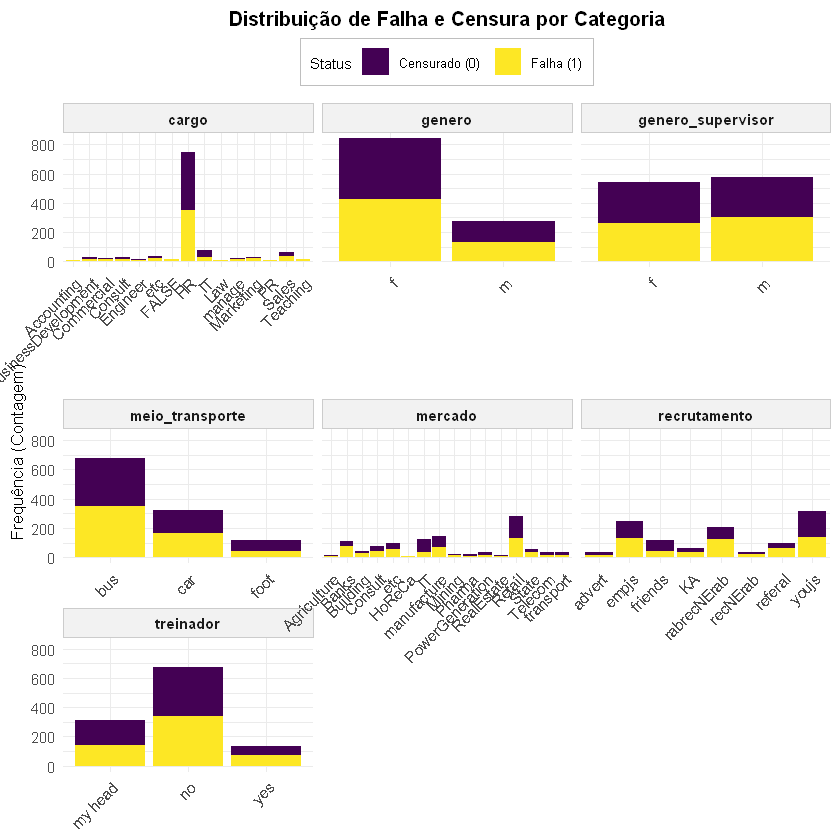

In [ ]:
# Criando data frame no formato longo
df_contagens_censura <- df %>%

    # Seleciona as colunas necessárias
    select(censura, genero, meio_transporte, treinador, mercado, cargo, recrutamento, genero_supervisor) %>%

        # Pivota em relação a censura
        pivot_longer(cols = -censura, names_to = "Tipo_Variavel", values_to = "Categoria") %>%

            # Calculo da contagem de valores
            count(Tipo_Variavel, Categoria, censura, name = "value") %>%

                # Transformado censura em uma coluna qualitativa
                mutate(censura = factor(censura, labels = c("Censurado (0)", "Falha (1)")))

# Gráfico
stacked_bar_plot <- ggplot(df_contagens_censura, aes(x = Categoria, y = value, fill = censura)) +

    # Barras
    geom_bar(stat = "identity") +

    # Título
    labs(x = NULL, y = "Frequência (Contagem)", fill = "Status", title = "Distribuição de Falha e Censura por Categoria") +

    # Paleta
    scale_fill_viridis(discrete = TRUE, option = "D") +

    # Layout subplots
    facet_wrap(~ Tipo_Variavel, scales = "free_x", strip.position = "top") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(size = 12, face = "bold", hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(size = 10),
        strip.background = element_rect(fill = "gray95", color = "gray80"),
        strip.text = element_text(face = "bold"),

        # Legenda
        legend.position = "top",
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank(),

        legend.title = element_text(size = 9),
        legend.text = element_text(size = 8)); stacked_bar_plot

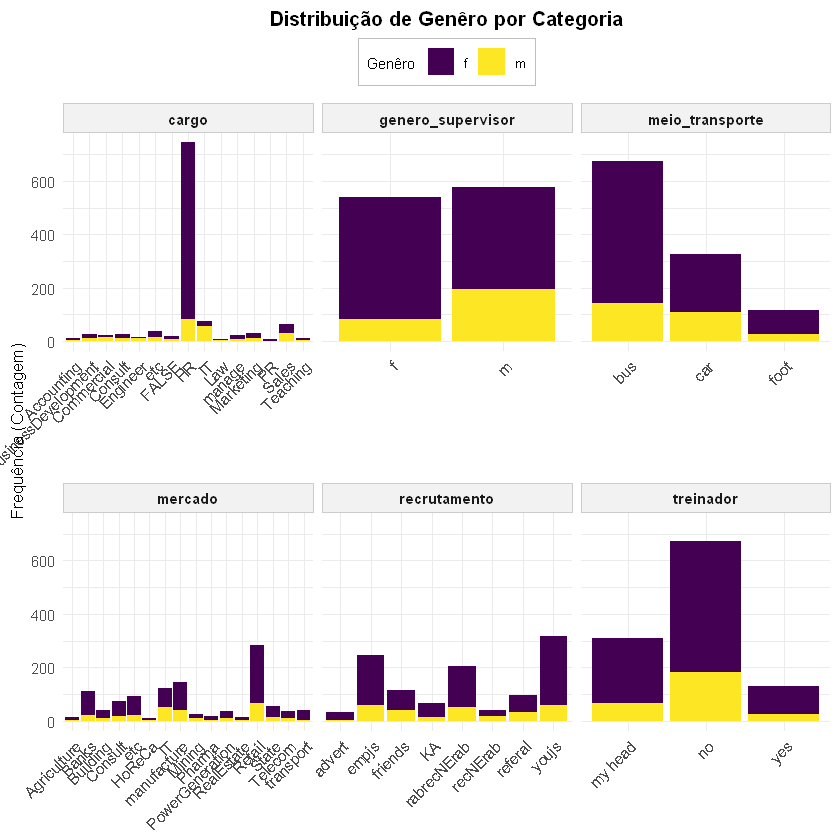

In [ ]:
# Criando data frame no formato longo
df_contagens_genero <- df %>%

    # Seleciona as colunas de interesse
    select(genero, meio_transporte, treinador, mercado, cargo, recrutamento, genero_supervisor) %>%

        # Formtando longo (exceto para a variável genero)
        pivot_longer(cols = -genero, names_to = "Tipo_Variavel", values_to = "Categoria") %>%

            # Calculo da contagem de valores
            count(Tipo_Variavel, Categoria, genero, name = "value")

# Gráfico
stacked_bar_plot <- ggplot(df_contagens_genero, aes(x = Categoria, y = value, fill = genero)) +

    # Barras
    geom_bar(stat = "identity") +

    # Títulos
    labs(x = NULL, y = "Frequência (Contagem)", fill = "Genêro", title = "Distribuição de Genêro por Categoria") +

    # Layout subplots
    facet_wrap(~ Tipo_Variavel, scales = "free_x", strip.position = "top") +

    # Paleta
    scale_fill_viridis(discrete = TRUE, option = "D") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(size = 12, face = "bold", hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(size = 10),
        strip.background = element_rect(fill = "gray95", color = "gray80"),
        strip.text = element_text(face = "bold"),

        # Legenda
        legend.position = "top",
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank(),

        legend.title = element_text(size = 9),
        legend.text = element_text(size = 8)); stacked_bar_plot

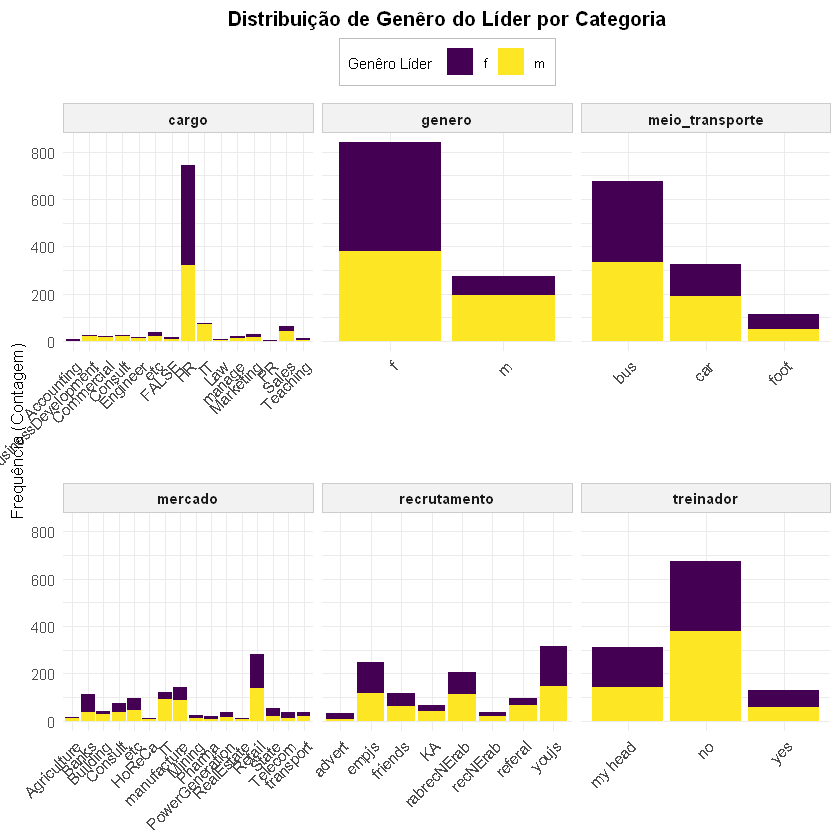

In [ ]:
# Criando data frame no formato longo
df_contagens_genero_lider <- df %>%

    # Seleciona as colunas de interesse
    select(genero, meio_transporte, treinador, mercado, cargo, recrutamento, genero_supervisor) %>%

        # Pivota em relação ao genero do líder
        pivot_longer(cols = -genero_supervisor, names_to = "Tipo_Variavel", values_to = "Categoria") %>%

            # Calculo da contagem de valores
            count(Tipo_Variavel, Categoria, genero_supervisor, name = "value")

# Gráfico
stacked_bar_plot <- ggplot(df_contagens_genero_lider, aes(x = Categoria, y = value, fill = genero_supervisor)) +

    # Barras
    geom_bar(stat = "identity") +

    # Títulos
    labs(x = NULL, y = "Frequência (Contagem)", fill = "Genêro Líder", title = "Distribuição de Genêro do Líder por Categoria") +

    # Layout subplots
    facet_wrap(~ Tipo_Variavel, scales = "free_x", strip.position = "top") +

    # Paleta
    scale_fill_viridis(discrete = TRUE, option = "D") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(size = 12, face = "bold", hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(size = 10),
        strip.background = element_rect(fill = "gray95", color = "gray80"),
        strip.text = element_text(face = "bold"),

        # Legenda
        legend.position = "top",
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank(),

        legend.title = element_text(size = 9),
        legend.text = element_text(size = 8)); stacked_bar_plot

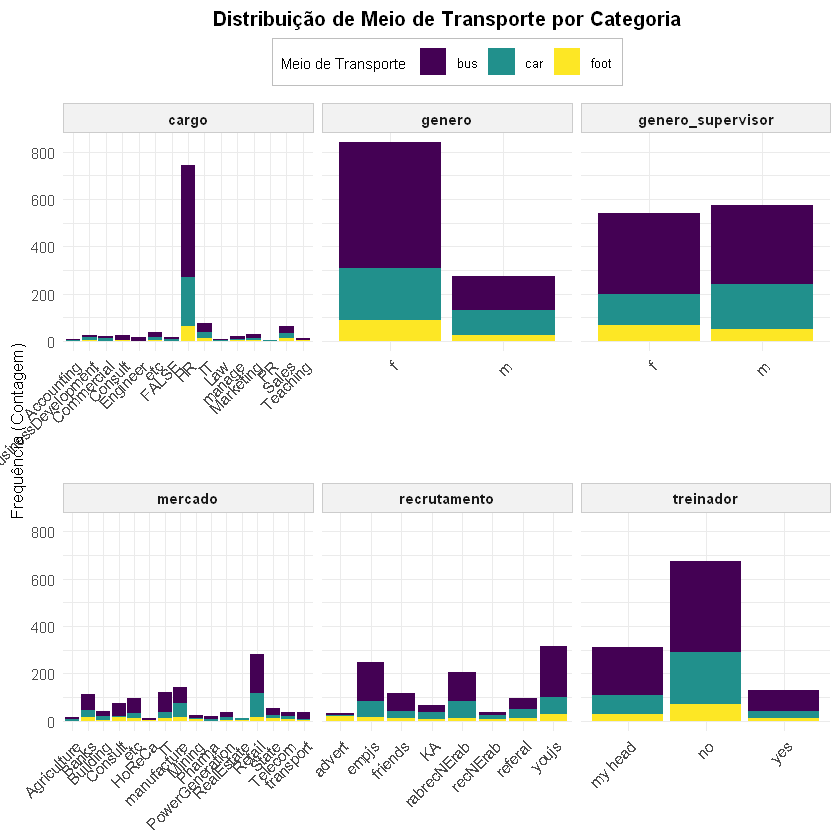

In [ ]:
# Criando data frame no formato longo
df_para_meio_tranp <- df %>%

    # Seleciona as colunas de interesse
    select(genero, meio_transporte, treinador, mercado, cargo, recrutamento, genero_supervisor) %>%

        # Pivota em relacão ao meio de transporte
        pivot_longer(cols = -meio_transporte, names_to = "Tipo_Variavel", values_to = "Categoria") %>%

            # Calculo da contagem de valores
            count(Tipo_Variavel, Categoria, meio_transporte, name = "value")

# Gráfico
stacked_bar_plot <- ggplot(df_para_meio_tranp, aes(x = Categoria, y = value, fill = meio_transporte)) +

    # Barras
    geom_bar(stat = "identity") +

    # Títulos
    labs(x = NULL, y = "Frequência (Contagem)", fill = "Meio de Transporte", title = "Distribuição de Meio de Transporte por Categoria") +

    # Layout subplots
    facet_wrap(~ Tipo_Variavel, scales = "free_x", strip.position = "top") +

    # Paleta
    scale_fill_viridis(discrete = TRUE, option = "D") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(size = 12, face = "bold", hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(size = 10),
        strip.background = element_rect(fill = "gray95", color = "gray80"),
        strip.text = element_text(face = "bold"),

        # Legenda
        legend.position = "top",
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank(),

        legend.title = element_text(size = 9),
        legend.text = element_text(size = 8)); stacked_bar_plot

# Análise de sobrevivência

## Objeto surv

In [ ]:
# Objeto surv
surv_obj <- Surv(time = df$tempo, event = df$censura)

## Apenas tempo de falha

### Não paramétrico

In [ ]:
# Ajustando o modelo Kaplan-Meier
km_fit <- survfit(surv_obj ~ 1, data = df)
hz_est <- muhaz(df$tempo, df$censura)

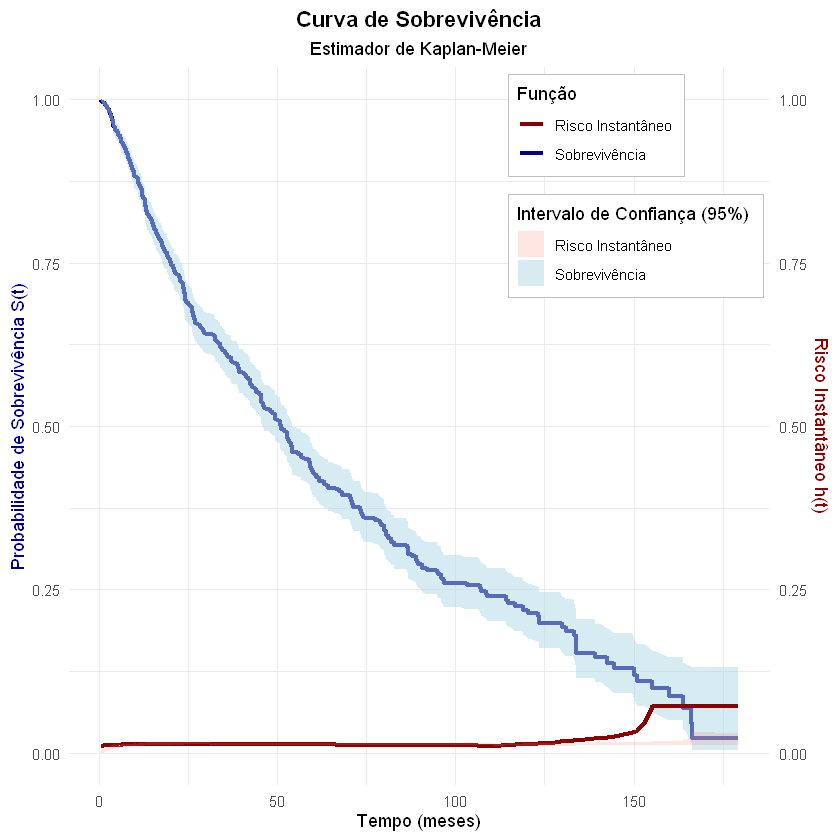

In [ ]:
# Curva de sobrevivência pelo estimador de Kaplan-Meier

# Organizando os dados
df_km <- data.frame(tempo = km_fit$time,
                    sobrevivencia = km_fit$surv, surv_lower = km_fit$lower, surv_upper = km_fit$upper,
                    risco_instantaneo = approx(hz_est$est.grid, hz_est$haz.est, xout = km_fit$time, method = "linear", rule = 2)$y,
                    risco_lower = -log(km_fit$upper) / km_fit$time,
                    risco_upper = -log(km_fit$lower) / km_fit$time)

# Gráfico
km_plot <- ggplot(df_km, aes(x = tempo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = "Sobrevivência"), size = 1.2) +

    # Intervalo de confiança da curva de sobrevivência
    geom_ribbon(aes(ymin = surv_lower, ymax = surv_upper, fill =  "Sobrevivência"), alpha = 0.5) +

    # Curva de risco acumulado
    geom_line(aes(y = risco_instantaneo, color = "Risco Instantâneo"), size = 1.2) +

    # Intervalo de confiança do risco instantâneo
    geom_ribbon(aes(ymin = risco_lower, ymax = risco_upper, fill = "Risco Instantâneo"), alpha = 0.2) +

    # Nomeação do eixo Y
    scale_y_continuous(name = "Probabilidade de Sobrevivência S(t)", sec.axis = sec_axis(~ ., name = "Risco Instantâneo h(t)")) +

    # Legenda e cores - Funções de sobrevivência (Linhas)
    scale_color_manual(name = "Função", values = c("Sobrevivência" = "darkblue", "Risco Instantâneo" = "darkred")) +

    # Legenda e cores - Intervalos de confiança
    scale_fill_manual(name = "Intervalo de Confiança (95%)", values = c("Sobrevivência" = "lightblue", "Risco Instantâneo" = "salmon")) +

    # Títulos
    labs(x = "Tempo (meses)", title = "Curva de Sobrevivência", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank(),

        # Cores
        axis.title.y.left = element_text(color = "darkblue"),
        axis.title.y.right = element_text(color = "darkred")); km_plot

In [ ]:
# Probabilidade de sobevivência por percentil de tempo

# Definição dos percentis
percentis <- c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)

# Extrai os tempos em cada percentil
tempos_dos_percentis <- quantile(df$tempo, probs = percentis)

# Calculando estatísticas apenas nos percentis
sumario_km <- summary(km_fit, times = tempos_dos_percentis)

# Data frame com resultados
df_resultados_percentis <- data.frame(
    Percentil_do_Tempo = percentis,
    Tempo_em_Meses = round(sumario_km$time, 2),
    S_t = round(sumario_km$surv, 4)); View(df_resultados_percentis)

,Percentil_do_Tempo,Tempo_em_Meses,S_t
,<dbl>,<dbl>,<dbl>
10%,0.1,4.96,0.9518
20%,0.2,9.10,0.8959
30%,0.3,13.90,0.8193
40%,0.4,19.12,0.7633
50%,0.5,24.44,0.6895
60%,0.6,34.23,0.6196
70%,0.7,45.37,0.5396
80%,0.8,58.81,0.4472
90%,0.9,86.29,0.3180


### Parmétrico

In [ ]:
# Estimando a função de sobrevivência
exp_model <- flexsurvreg(surv_obj ~ 1, data = df, dist = "exp")
weibull_model <- flexsurvreg(surv_obj ~ 1, data = df, dist = "weibull")
gompertz_model <- flexsurvreg(surv_obj ~ 1, data = df, dist = "gompertz")
lnorm_model <- flexsurvreg(surv_obj ~ 1, data = df, dist = "lnorm")
llogis_model <- flexsurvreg(surv_obj ~ 1, data = df, dist = "llogis")
gamma_model <- flexsurvreg(surv_obj ~ 1, data = df, dist = "gamma")
gengamma_model <- flexsurvreg(surv_obj ~ 1, data = df, dist = "gengamma")

In [ ]:
# Extraindo as funções de sobrevivência

# Função para extrair a função de sobreviencia
extrair_surv <- function(modelo) {

    # Extrai os valores da função de sobreviencia do modelo
    sumario <- summary(modelo, type = "survival")

    # Retorna um vetor com os valores da função de sobrevivência em cada unidade de tempo
    return (modelo = sumario[[1]]$est)
}

# Organizar em um data frame
df_parametric_km <- data.frame(Tempo = km_fit$time,
                    Kaplan_Meier = round(km_fit$surv, 5),
                    Exponencial = round(extrair_surv(exp_model), 5),
                    Weibull = round(extrair_surv(weibull_model), 5),
                    Gompertz = round(extrair_surv(gompertz_model), 5),
                    LogNormal = round(extrair_surv(lnorm_model), 5),
                    LogLogistic = round(extrair_surv(llogis_model), 5),
                    Gamma = round(extrair_surv(gamma_model), 5),
                    GenGamma = round(extrair_surv(gengamma_model), 5)); head(df_parametric_km);

,Tempo,Kaplan_Meier,Exponencial,Weibull,Gompertz,LogNormal,LogLogistic,Gamma,GenGamma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3942505,0.99910,0.99462,0.99618,0.99477,0.99988,0.99847,0.99684,0.99904
2,0.4271047,0.99821,0.99418,0.99584,0.99434,0.99984,0.99830,0.99655,0.99890
3,0.4928131,0.99821,0.99328,0.99515,0.99347,0.99976,0.99794,0.99594,0.99861
4,0.5256674,0.99821,0.99284,0.99481,0.99304,0.99972,0.99775,0.99564,0.99846
5,0.6899384,0.99821,0.99061,0.99306,0.99087,0.99940,0.99675,0.99409,0.99759
6,0.7556468,0.99731,0.98972,0.99236,0.99001,0.99923,0.99632,0.99345,0.99721


In [ ]:
# Extrair taxas de risco

# Função para extrair a taxa de risco
extrair_hazard <- function(modelo) {

    # Extrai a taxa de risco
    sumario <- summary(modelo, type = "hazard")

    # Retorna um vetor com os valores da taxa de risco em cada unidade de tempo
    return (modelo = sumario[[1]]$est)
}

# Armezena a taxa de risco
df_hazards <- data.frame(
    Tempo = km_fit$time,
    Kaplan_Meier = round(approx(hz_est$est.grid, hz_est$haz.est, xout = km_fit$time, method = "linear", rule = 2)$y, 5),
    Exponencial = round(extrair_hazard(exp_model), 5),
    Weibull = round(extrair_hazard(weibull_model), 5),
    Gompertz = round(extrair_hazard(gompertz_model), 5),
    LogNormal = round(extrair_hazard(lnorm_model), 5),
    LogLogistic = round(extrair_hazard(llogis_model), 5),
    Gamma = round(extrair_hazard(gamma_model), 5),
    GenGamma = round(extrair_hazard(gengamma_model), 5)); head(df_hazards); tail(df_hazards)

,Tempo,Kaplan_Meier,Exponencial,Weibull,Gompertz,LogNormal,LogLogistic,Gamma,GenGamma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3942505,0.01100,0.01367,0.01038,0.01329,0.00093,0.00524,0.00902,0.00406
2,0.4271047,0.01101,0.01367,0.01044,0.01329,0.00108,0.00539,0.00911,0.00426
3,0.4928131,0.01103,0.01367,0.01054,0.01329,0.00138,0.00567,0.00927,0.00465
4,0.5256674,0.01104,0.01367,0.01059,0.01329,0.00153,0.00580,0.00934,0.00483
5,0.6899384,0.01108,0.01367,0.01079,0.01329,0.00234,0.00638,0.00966,0.00566
6,0.7556468,0.01110,0.01367,0.01086,0.01330,0.00268,0.00659,0.00976,0.00595


,Tempo,Kaplan_Meier,Exponencial,Weibull,Gompertz,LogNormal,LogLogistic,Gamma,GenGamma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768,163.7782,0.07174,0.01367,0.01577,0.01522,0.00698,0.00697,0.01551,0.01024
769,163.8111,0.07174,0.01367,0.01577,0.01522,0.00698,0.00697,0.01551,0.01024
770,164.5667,0.07174,0.01367,0.01578,0.01523,0.00696,0.00694,0.01551,0.01022
771,166.0780,0.07174,0.01367,0.01579,0.01525,0.00693,0.00689,0.01551,0.01019
772,166.2752,0.07174,0.01367,0.01579,0.01525,0.00692,0.00689,0.01551,0.01018
773,179.4497,0.07174,0.01367,0.01587,0.01542,0.00661,0.00648,0.01555,0.00992


Warning message:
"Removed 773 rows containing missing values or values outside the scale range
(`geom_line()`)."


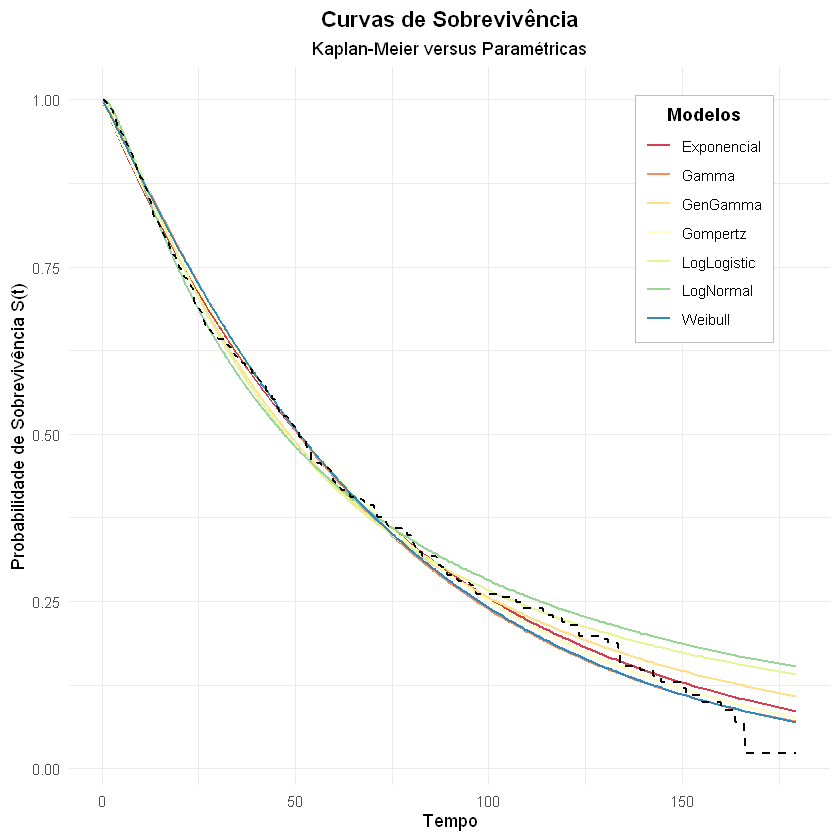

In [ ]:
# Avaliando a sobrevivência estimada vs. KM

# Transformando para o formato longo
df_longo_estimacap <- df_parametric_km %>%

    # Pivotando em relação ao tempo
    pivot_longer(cols = -Tempo, names_to = "Modelo", values_to = "Valor_St")

# Gráfico
parametric_plot <- ggplot() +

    # Linhas dos modelos paramétricos
    geom_line(data = df_longo_estimacap, aes(x = Tempo, y = Valor_St, color = Modelo), size = 0.75) +

    # Linha Kaplan-Meier
    geom_step(data = df_longo_estimacap %>% filter(Modelo == "Kaplan_Meier"), aes(x = Tempo, y = Valor_St), color = "black", size = 0.75, linetype = "dashed") +

    # Títulos
    labs(title = "Curvas de Sobrevivência", subtitle = "Kaplan-Meier versus Paramétricas",  x = "Tempo", y = "Probabilidade de Sobrevivência S(t)", color = "Modelos" ) +

    # Tema
    theme_minimal() +

    # Paleta de cores
    scale_color_brewer(palette = "Spectral", limits = ~ setdiff(.x, "Kaplan_Meier")) +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Legenda
        legend.position = c(0.925, 0.96),
        legend.justification = c("right", "top"),
        legend.title = element_text(face = "bold", hjust = 0.5),
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank()); parametric_plot

In [ ]:
# Avaliando os parâmetos de cada distribuição


`geom_smooth()` using formula = 'y ~ x'


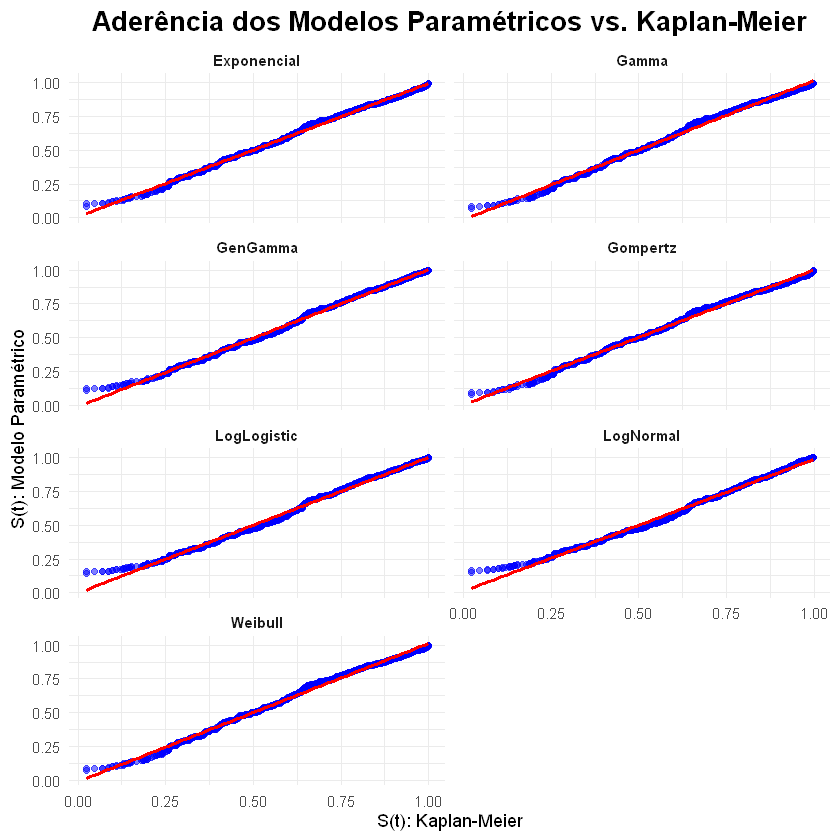

In [ ]:
#  Aderência de modelos paramétricos com o Kaplan-Meier

# Transformando os dados do formtato largo para o longo
df_long_ader_surv <- df_parametric_km %>%

    # Seleciona apenas as colunas necessárias
    select(Kaplan_Meier, Exponencial, Weibull, Gompertz, LogNormal, LogLogistic, Gamma, GenGamma) %>%

        # Pivota os dados com base no modelo de Kaplan-Meier
        pivot_longer(cols = -Kaplan_Meier, names_to = "Modelo", values_to = "Valor_St")

# Gráfico
aderencia_plot_final <- ggplot(df_long_ader_surv, aes(x = Kaplan_Meier, y = Valor_St)) +

    # Dispersão e linha
    geom_point(alpha = 0.5, color = "blue") +
    geom_smooth(method = "lm", se = FALSE, color = "red") +

    # Painel de subplots
    facet_wrap(~ Modelo, ncol = 2) +

    # Títulos
    labs(title = "Aderência dos Modelos Paramétricos vs. Kaplan-Meier", x = "S(t): Kaplan-Meier", y = "S(t): Modelo Paramétrico") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16), strip.text = element_text(face = "bold")); aderencia_plot_final

Warning message:
"Removed 773 rows containing missing values or values outside the scale range
(`geom_line()`)."


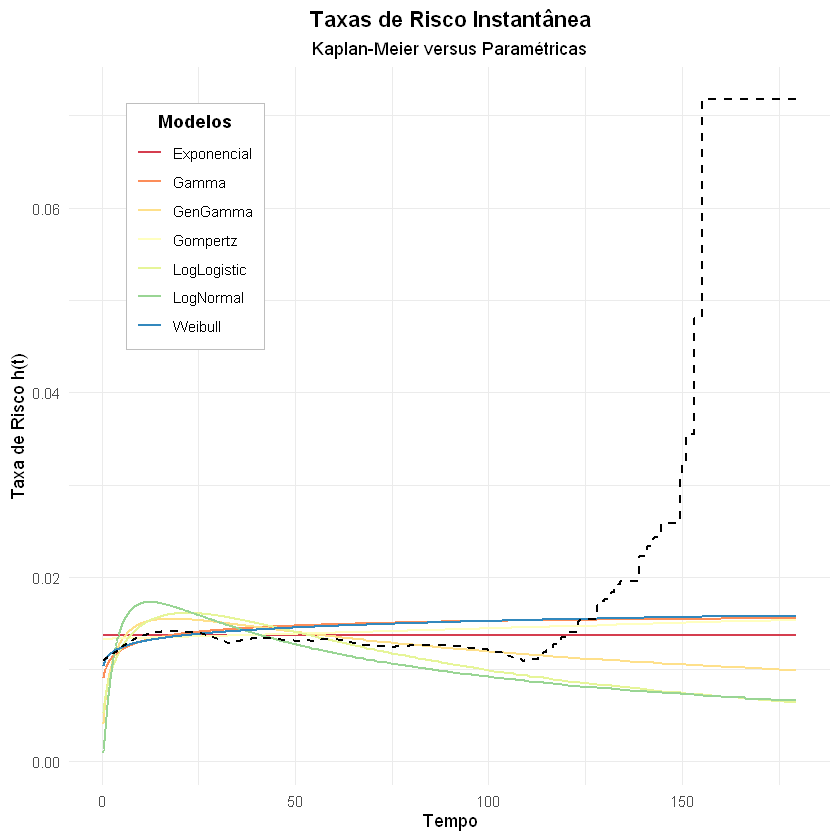

In [ ]:
# Avaliando as forma das taxas de risco paramétricas vs. KM

# Transformando para o formato longo
df_longo_hazards <- df_hazards %>%

    # Pivotando em relação ao tempo
    pivot_longer(cols = -Tempo, names_to = "Modelo", values_to = "Valor_St")

# Gráfico
parametric_hazards_plot <- ggplot() +

    # Linhas dos modelos paramétricos
    geom_line(data = df_longo_hazards, aes(x = Tempo, y = Valor_St, color = Modelo), size = 0.75) +

    # Linha do Kaplan-Meier
    geom_step(data = df_longo_hazards %>% filter(Modelo == "Kaplan_Meier"), aes(x = Tempo, y = Valor_St), color = "black", size = 0.75, linetype = "dashed") +

    # Títulos
    labs(title = "Taxas de Risco Instantânea", subtitle = "Kaplan-Meier versus Paramétricas",  x = "Tempo", y = "Taxa de Risco h(t)", color = "Modelos") +

    # Tema
    theme_minimal() +

    # Paleta de cores
    scale_color_brewer(palette = "Spectral", limits = ~ setdiff(.x, "Kaplan_Meier")) +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Legenda
        legend.position = c(0.075, 0.95),
        legend.justification = c("left", "top"),
        legend.title = element_text(face = "bold", hjust = 0.5),
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank()); parametric_hazards_plot

In [ ]:
# AIC (tabela comparativa)

# Funçao para extrair AIC de cada modelo
extrair_aic_vic <- function(modelo) {

    # Obtém o AIC
    aic <- modelo$AIC

    # Retorna um vetor com os dois valores
    return (c(AIC = aic))
}

# Armezena AIC e BIC de cada modelo
df_aic <- data.frame(
    rbind(
        Exponencial = extrair_aic_vic(exp_model),
        Weibull = extrair_aic_vic(weibull_model),
        Gompertz = extrair_aic_vic(gompertz_model),
        LogNormal = extrair_aic_vic(lnorm_model),
        LogLogistic = extrair_aic_vic(llogis_model),
        Gamma = extrair_aic_vic(gamma_model),
        GenGamma = extrair_aic_vic(gengamma_model)
    )
); df_aic

,AIC
,<dbl>
Exponencial,5929.483
Weibull,5927.470
Gompertz,5931.095
LogNormal,5926.986
LogLogistic,5926.850
Gamma,5925.273
GenGamma,5916.774


In [ ]:
# Razão de Verossimilhança (modelos aninhados)

# Função para realizar teste da razão de verossimilhança
TRV <- function(modelo_especial, modelo_completo) {

    # Obtém o log da verossimilhanca
    loglik_especial <- modelo_especial$loglik
    loglik_completo <- modelo_completo$loglik

    # Cálculo a estaística do teste
    LR_stat <- 2 * (loglik_completo - loglik_especial)

    # Graus de liberdade
    df <- length(coef(modelo_completo)) - length(coef(modelo_especial))

    # Cálculo do pvalue
    p_value <- pchisq(LR_stat, df = df, lower.tail = FALSE)

    # Retorna estatística do teste e pvalue
    return (c(LR_stat = round(LR_stat, 4), p_value = round(p_value, 4)))
}


#  Razão de Verossimilhança - Exponencial vs Weibull
exp_weib <- TRV(exp_model, weibull_model)

# Razão de Verossimilhança - Exponencial vs Gamma
exp_gam <- TRV(exp_model, gamma_model)

# Razão de Verossimilhança - Exponencial vs Gamma Generalizada
exp_gengam <- TRV(exp_model, gengamma_model)

# Razão de Verossimilhança - Weibull vs Gamma Generalizada
weib_gengam <- TRV(weibull_model, gengamma_model)

# Razão de Verossimilhança - Weibull vs Gamma
weib_gam <- TRV(weibull_model, gamma_model)

# Razão de Verossimilhança - Gamma vs Gamma Generalizada
gam_gengam <- TRV(gamma_model, gengamma_model)


# Armazendano para melhor comparção
df_TRV <- data.frame(
    rbind(
        `Exponencial vs Weibull` = exp_weib,
        `Exponencial vs Gamma` = exp_gam,
        `Exponencial vs Gengamma` = exp_gengam,
        `Weibull vs Gengamma` = weib_gengam,
        `Weibull vs Gamma` = weib_gam,
        `Gamma vs Gengamma` = gam_gengam)); df_TRV

,LR_stat,p_value
,<dbl>,<dbl>
Exponencial vs Weibull,4.0126,0.0452
Exponencial vs Gamma,6.2093,0.0127
Exponencial vs Gengamma,16.7084,0.0002
Weibull vs Gengamma,12.6958,0.0004
Weibull vs Gamma,2.1967,0.0000
Gamma vs Gengamma,10.4991,0.0012


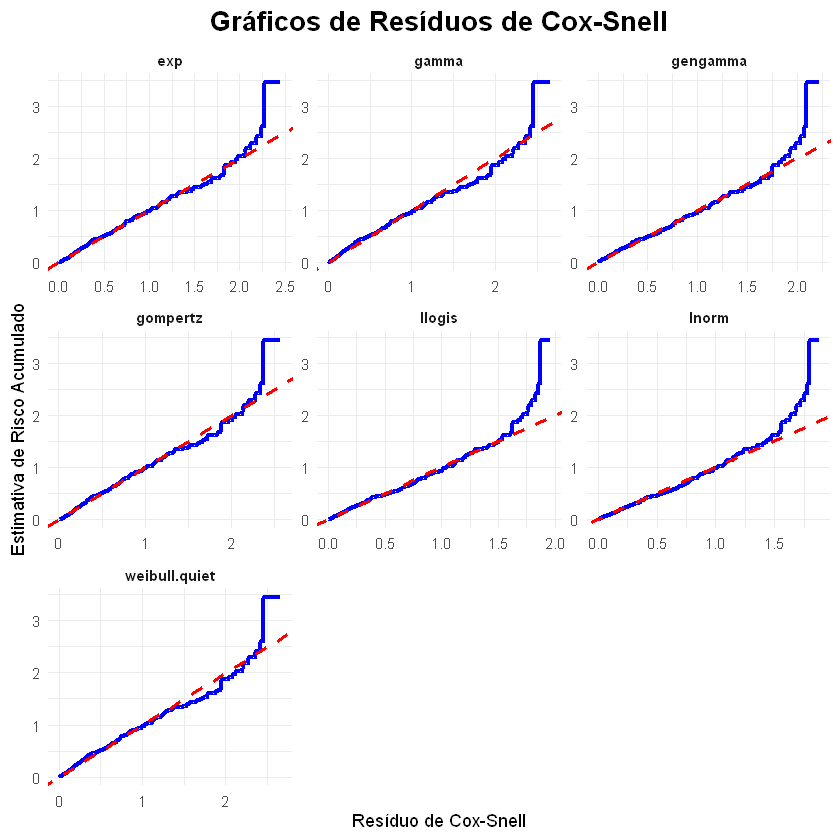

In [ ]:
# Resíduos de Cox-Snell e resíduos padronizados

# Função para calcular os resíduos de cox-snell
residuos_cox_snell <- function(modelo, dados) {

    # Extrai os tempos observados e status
    tempo <- dados$tempo
    status <- dados$censura

    # Estima a sobrevivência no tempo observado (formula)
    S_t <- summary(modelo, type = "survival", t = tempo)[[1]]$est

    # Calcula o resíduos de sox-snell (H(t) = -log(S(t))
    residuos <- -log(S_t)

    # Estima a função KM com base nos resíduos do modelo
    ajuste_km <- survfit(Surv(residuos, status) ~ 1, type = "fh")

    # Extrai o nome do modelo
    nome_modelo <- modelo$dlist$name

    # Data frame para retorno da função
    df <- data.frame(modelo = nome_modelo, tempo = ajuste_km$time, risco_acumulado = -log(ajuste_km$surv))

    return(df)
}

# Aplicando a função em cada modelo
exp_cs <- residuos_cox_snell(exp_model, df)
weib_cs <- residuos_cox_snell(weibull_model, df)
gomp_cs <- residuos_cox_snell(gompertz_model, df)
lnorm_cs <- residuos_cox_snell(lnorm_model, df)
llogis_cs <- residuos_cox_snell(llogis_model, df)
gam_cs <- residuos_cox_snell(gamma_model, df)
gengam_cs <- residuos_cox_snell(gengamma_model, df)

# Mescando as linhas
df_cs <- rbind(exp_cs, weib_cs, gomp_cs, lnorm_cs, llogis_cs, gam_cs, gengam_cs)

# Gráfico
ggplot(df_cs, aes(x = tempo, y = risco_acumulado)) +

    # Risco acumulado e linha reta
    geom_step(color = "blue", size = 1.2) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red", size = 1) +

    # Títulos
    labs(title = "Gráficos de Resíduos de Cox-Snell", x = "Resíduo de Cox-Snell",y = "Estimativa de Risco Acumulado") +

    # Esquema para subplots
    facet_wrap(~ modelo, scales = "free") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16), strip.text = element_text(face = "bold"))

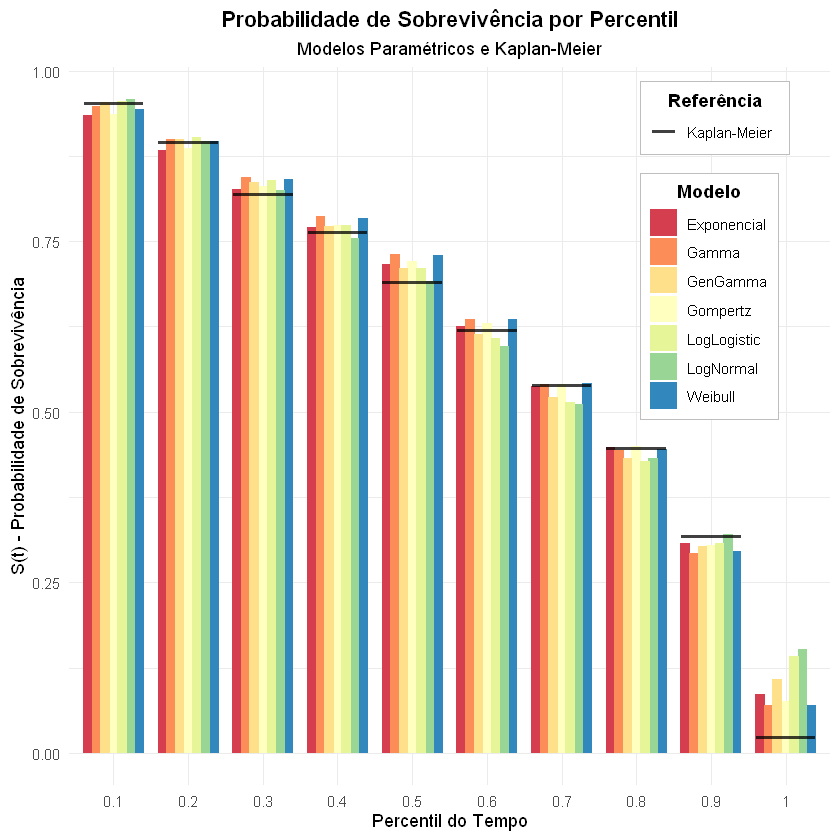

In [ ]:
# Probabilidade de sobevivência por percentil de tempo

# Definição dos percentis
percentis <- c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)

# Extrai os tempos em cada percentil
tempos_dos_percentis <- quantile(df$tempo, probs = percentis)

# Obtém a sobrevivência estimada nos percentis do tempos
sumario_exp <- summary(exp_model, type = "survival", t = tempos_dos_percentis)
sumario_weib <- summary(weibull_model, type = "survival", t = tempos_dos_percentis)
sumario_gomp <- summary(gompertz_model, type = "survival", t = tempos_dos_percentis)
sumario_lnorm <- summary(lnorm_model, type = "survival", t = tempos_dos_percentis)
sumario_llogis <- summary(llogis_model, type = "survival", t = tempos_dos_percentis)
sumario_gam <- summary(gamma_model, type = "survival", t = tempos_dos_percentis)
sumario_gengam <- summary(gengamma_model, type = "survival", t = tempos_dos_percentis)

# Organiza cada modelo em colunas
st_exp <- bind_rows(sumario_exp)
st_weib <- bind_rows(sumario_weib)
st_gomp <- bind_rows(sumario_gomp)
st_lnorm <- bind_rows(sumario_lnorm)
st_llogis <- bind_rows(sumario_llogis)
st_gam <- bind_rows(sumario_gam)
st_gengam <- bind_rows(sumario_gengam)

# Mesclando as sobrevivências de cada modelo
percentis_parametric <- cbind(round(st_exp$time, 4), round(st_exp$est, 4), round(st_weib$est, 4), round(st_gomp$est, 4), round(st_lnorm$est, 4),
                            round(st_llogis$est, 4), round(st_gam$est, 4), round(st_gengam$est, 4))

# Trasnforma em data frame
df_percent_parametric <- as.data.frame(percentis_parametric)

# Renomeia as colunas
df_percent_parametric <- setNames(df_percent_parametric, c("Tempo_em_Meses", "Exponencial", "Weibull", "Gompertz", "LogNormal", "LogLogistic", "Gamma", "GenGamma"))

# Organiza o data frame final
df_percent_parametric <- df_percent_parametric %>%

    # Adiciona a coluna de percentil do tempo e a sobrevivência do modelo de Kaplan Meier
    mutate(Percentil_do_Tempo = percentis, Kaplan_Meier = df_resultados_percentis$S_t) %>%

            # Organiza a ordem das colunas, já que o mutate adiciona no final
            select(Percentil_do_Tempo, Tempo_em_Meses, Kaplan_Meier, everything())

# Transforma no formato longo para gráfio
df_long_perce_param <- df_percent_parametric %>%

    # Exclui a coluna do modelo de Kaplan Meier
    select(-Kaplan_Meier) %>%

        # Pivota os modelos
        pivot_longer(cols = -c(Percentil_do_Tempo, Tempo_em_Meses), names_to = "Modelo", values_to = "S_t")

# Gráfico
compração_percentis <- ggplot(df_long_perce_param, aes(x = factor(Percentil_do_Tempo), y = S_t, fill = Modelo)) +

    # Gráfico de barras para comparar modelos paramétricos
    geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +

    # Linha reta que representa o modelo de Kaplan Meier
    geom_segment(data = df_percent_parametric, aes(x = as.numeric(factor(Percentil_do_Tempo)) - 0.4,
            xend = as.numeric(factor(Percentil_do_Tempo)) + 0.4, y = Kaplan_Meier,
            yend = Kaplan_Meier, color = "Kaplan-Meier"), inherit.aes = FALSE, alpha = 0.75, size = 1.0) +

    # Paleta de cores modelos paramétricos
    scale_fill_brewer(palette = "Spectral") +

    # Cor da linha representante do modelo Kaplan Meier
    scale_color_manual(name = "Referência", values = c("Kaplan-Meier" = "black")) +

    # Títulos
    labs(title = "Probabilidade de Sobrevivência por Percentil", subtitle = "Modelos Paramétricos e Kaplan-Meier", x = "Percentil do Tempo", y = "S(t) - Probabilidade de Sobrevivência") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Legenda
        legend.position = c(0.75, 0.98),
        legend.justification = c("left", "top"),
        legend.title = element_text(face = "bold", hjust = 0.5),
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank()); compração_percentis

## Curvas por grupo

In [ ]:
# Categorizando as variáveis quantitativas

# Data fram sem valores quantitativos
df_para_reg <- df %>%

  # Crias as colunas e preenche com base na regra para categorização
  mutate(idade_categorizada = ifelse(idade < 18, 'Adolecente', ifelse(idade >= 18 & idade < 30, 'Jovem', ifelse(idade >= 30 & idade < 50, 'Adulto', 'Idoso'))),
        extroversao_categorizada = ifelse(extroversao < 2.5, 'Baixa', ifelse(extroversao >= 2.5 & extroversao < 5.0, 'Média', ifelse(extroversao >= 5.0 & extroversao <= 7.5, 'Alta', 'Muito alta'))),
        independencia_categorizada = ifelse(independencia < 2.5, 'Baixa', ifelse(independencia >= 2.5 & independencia < 5.0, 'Média', ifelse(independencia >= 5.0 & independencia <= 7.5, 'Alta', 'Muito alta'))),
        auto_controle_categorizado = ifelse(auto_controle < 2.5, 'Baixa', ifelse(auto_controle >= 2.5 & auto_controle < 5.0, 'Média', ifelse(auto_controle >= 5.0 & auto_controle <= 7.5, 'Alta', 'Muito alta'))),
        ansiedade_categorizada = ifelse(ansiedade < 2.5, 'Baixa', ifelse(ansiedade >= 2.5 & ansiedade < 5.0, 'Média', ifelse(ansiedade >= 5.0 & ansiedade <= 7.5, 'Alta', 'Muito alta')))) %>%

          # Seleciona apenas as colunas de interesse
          select(tempo, censura, genero, mercado, cargo, recrutamento, treinador, genero_supervisor, meio_transporte,	idade_categorizada, extroversao_categorizada, independencia_categorizada, auto_controle_categorizado, ansiedade_categorizada)

In [ ]:
# Ajustando o modelo de Kaplan-Meier para cada grupo
km_fit_1 <- survfit(surv_obj ~ genero, data = df_para_reg)
km_fit_2 <- survfit(surv_obj ~ mercado, data = df_para_reg)
km_fit_3 <- survfit(surv_obj ~ cargo, data = df_para_reg)
km_fit_4 <- survfit(surv_obj ~ recrutamento, data = df_para_reg)
km_fit_5 <- survfit(surv_obj ~ treinador, data = df_para_reg)
km_fit_6 <- survfit(surv_obj ~ genero_supervisor, data = df_para_reg)
km_fit_7 <- survfit(surv_obj ~ meio_transporte, data = df_para_reg)
km_fit_8 <- survfit(surv_obj ~ idade_categorizada, data = df_para_reg)
km_fit_9 <- survfit(surv_obj ~ extroversao_categorizada, data = df_para_reg)
km_fit_10 <- survfit(surv_obj ~ independencia_categorizada, data = df_para_reg)
km_fit_11 <- survfit(surv_obj ~ auto_controle_categorizado, data = df_para_reg)
km_fit_12 <- survfit(surv_obj ~ ansiedade_categorizada, data = df_para_reg)

In [ ]:
# Teste log rank
log_rank_km_fit_1 <- survdiff(surv_obj ~ genero, data = df_para_reg, rho=0);
log_rank_km_fit_2 <- survdiff(surv_obj ~ mercado, data = df_para_reg, rho=0);
log_rank_km_fit_3 <- survdiff(surv_obj ~ cargo, data = df_para_reg, rho=0)
log_rank_km_fit_4 <- survdiff(surv_obj ~ recrutamento, data = df_para_reg, rho=0)
log_rank_km_fit_5 <- survdiff(surv_obj ~ treinador, data = df_para_reg, rho=0)
log_rank_km_fit_6 <- survdiff(surv_obj ~ genero_supervisor, data = df_para_reg, rho=0)
log_rank_km_fit_7 <- survdiff(surv_obj ~ meio_transporte, data = df_para_reg, rho=0)
log_rank_km_fit_8 <- survdiff(surv_obj ~ idade_categorizada, data = df_para_reg, rho=0)
log_rank_km_fit_9 <- survdiff(surv_obj ~ extroversao_categorizada, data = df_para_reg, rho=0)
log_rank_km_fit_10 <- survdiff(surv_obj ~ independencia_categorizada, data = df_para_reg, rho=0)
log_rank_km_fit_11 <- survdiff(surv_obj ~ auto_controle_categorizado, data = df_para_reg, rho=0)
log_rank_km_fit_12 <- survdiff(surv_obj ~ ansiedade_categorizada, data = df_para_reg, rho=0)

# Tabela com pvalores

# Variáveis
vari_pvalue <- names(df_para_reg)[-c(1, 2)]

# Pvalue
log_rank <- c(log_rank_km_fit_1$pvalue, log_rank_km_fit_2$pvalue, log_rank_km_fit_3$pvalue, log_rank_km_fit_4$pvalue, log_rank_km_fit_5$pvalue, log_rank_km_fit_6$pvalue,
            log_rank_km_fit_7$pvalue, log_rank_km_fit_8$pvalue, log_rank_km_fit_9$pvalue, log_rank_km_fit_10$pvalue, log_rank_km_fit_11$pvalue, log_rank_km_fit_12$pvalue)

# Estatistica
stats_log_rank <- c(log_rank_km_fit_1$chisq, log_rank_km_fit_2$chisq, log_rank_km_fit_3$chisq, log_rank_km_fit_4$chisq, log_rank_km_fit_5$chisq, log_rank_km_fit_6$chisq,
                    log_rank_km_fit_7$chisq, log_rank_km_fit_8$chisq, log_rank_km_fit_9$chisq, log_rank_km_fit_10$chisq, log_rank_km_fit_11$chisq, log_rank_km_fit_12$chisq)

# Dataframe
df_log_rank <- data.frame(Variavel = vari_pvalue, Estatística = round(stats_log_rank, 5), p_value = round(log_rank, 4)) %>%

    # Decisão sobre o teste de hipótese (log rank)
    mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'),
            Interpratação = ifelse(p_value <= 0.05, 'Há diferença entre os grupos', 'Não há diferença entre os grupos')); df_log_rank

Variavel,Estatística,p_value,Decisao,Interpratação
<chr>,<dbl>,<dbl>,<chr>,<chr>
genero,2.21368,0.1368,Não se rejeita H_0,Não há diferença entre os grupos
mercado,64.18977,0.0000,Rejeita-se H_0,Há diferença entre os grupos
cargo,30.19522,0.0072,Rejeita-se H_0,Há diferença entre os grupos
recrutamento,23.64093,0.0013,Rejeita-se H_0,Há diferença entre os grupos
treinador,2.91024,0.2334,Não se rejeita H_0,Não há diferença entre os grupos
genero_supervisor,1.06676,0.3017,Não se rejeita H_0,Não há diferença entre os grupos
meio_transporte,12.59488,0.0018,Rejeita-se H_0,Há diferença entre os grupos
idade_categorizada,1.19740,0.5495,Não se rejeita H_0,Não há diferença entre os grupos
extroversao_categorizada,7.75353,0.0514,Não se rejeita H_0,Não há diferença entre os grupos


##### Gráficos

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
"
Warning message:
"Removed 320 rows containing missing values or values outside the scale range
(`geom_step()`)."


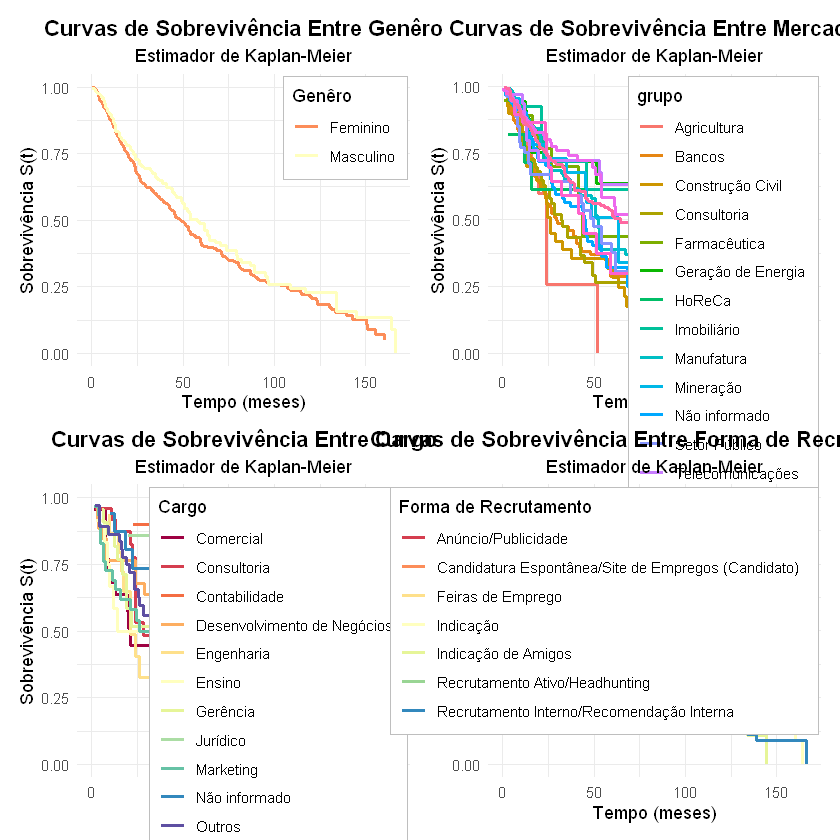

In [ ]:
# Curvas entre genêro

# Cria um objeto para acessar os dados
summary_km_fit_1 <- summary(km_fit_1)

# Extrai os dados necessários para plot
df_surv_km_fit_1 <- data.frame(tempo = summary_km_fit_1$time, sobrevivencia = summary_km_fit_1$surv, surv_lower = summary_km_fit_1$lower,
                              surv_upper = summary_km_fit_1$upper, grupo = summary_km_fit_1$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = ifelse(grupo == "genero=f", "Feminino", ifelse(grupo == "genero=m", "Masculino", "Sem Genêro")))

# Gráfico
km_fit_1_plot <- ggplot(df_surv_km_fit_1, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Genêro", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Genêro", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())


# Curvas entre Mercado

# Cria um objeto para acessar os dados
summary_km_fit_2 <- summary(km_fit_2)

# Extrai os dados necessários para plot
df_surv_km_fit_2 <- data.frame(tempo = summary_km_fit_2$time, sobrevivencia = summary_km_fit_2$surv, surv_lower = summary_km_fit_2$lower,
                              surv_upper = summary_km_fit_2$upper, grupo = summary_km_fit_2$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "mercado=Banks" ~ "Bancos", grupo == "mercado=PowerGeneration" ~ "Geração de Energia", grupo == "mercado=Retail" ~ "Varejo",
                          grupo == "mercado=manufacture" ~ "Manufatura", grupo == "mercado=Consult" ~ "Consultoria", grupo == "mercado=State" ~ "Setor Público",
                          grupo == "mercado=Building" ~ "Construção Civil", grupo == "mercado=IT" ~ "TI", grupo == "mercado=HoReCa" ~ "HoReCa",
                          grupo == "mercado=Telecom" ~ "Telecomunicações", grupo == "mercado=Pharma" ~ "Farmacêutica", grupo == "mercado=Mining" ~ "Mineração",
                          grupo == "mercado=transport" ~ "Transporte", grupo == "mercado=Agriculture" ~ "Agricultura", grupo == "mercado=RealEstate" ~ "Imobiliário",
                          grupo == "mercado=etc" ~ "Não informado", TRUE ~ grupo))


# Gráfico
km_fit_2_plot <- ggplot(df_surv_km_fit_2, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Mercado", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "horizontal",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Curvas entre Cargo

# Cria um objeto para acessar os dados
summary_km_fit_3 <- summary(km_fit_3)

# Extrai os dados necessários para plot
df_surv_km_fit_3 <- data.frame(tempo = summary_km_fit_3$time, sobrevivencia = summary_km_fit_3$surv, surv_lower = summary_km_fit_3$lower,
                              surv_upper = summary_km_fit_3$upper, grupo = summary_km_fit_3$strata) %>%

  # Substirui valores na colunas 'Grupo'
    mutate(grupo = case_when(grupo == "cargo=Accounting" ~ "Contabilidade", grupo == "cargo=BusinessDevelopment" ~ "Desenvolvimento de Negócios", grupo == "cargo=Commercial" ~ "Comercial",
                            grupo == "cargo=Consult" ~ "Consultoria", grupo == "cargo=Engineer" ~ "Engenharia", grupo == "cargo=etc" ~ "Outros", grupo == "cargo=FALSE" ~ "Não informado",
                            grupo == "cargo=HR" ~ "Recursos Humanos", grupo == "cargo=IT" ~ "TI", grupo == "cargo=Law" ~ "Jurídico", grupo == "cargo=manage" ~ "Gerência", grupo == "cargo=Marketing" ~ "Marketing",
                            grupo == "cargo=PR" ~ "Relações Públicas", grupo == "cargo=Sales" ~ "Vendas", grupo == "cargo=Teaching" ~ "Ensino", TRUE ~ grupo))

# Gráfico
km_fit_3_plot <- ggplot(df_surv_km_fit_3, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Cargo", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Cargo", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Curvas entre Forma de Recrutamento

# Cria um objeto para acessar os dados
summary_km_fit_4 <- summary(km_fit_4)

# Extrai os dados necessários para plot
df_surv_km_fit_4 <- data.frame(tempo = summary_km_fit_4$time, sobrevivencia = summary_km_fit_4$surv, surv_lower = summary_km_fit_4$lower,
                              surv_upper = summary_km_fit_4$upper, grupo = summary_km_fit_4$strata) %>%

    # Substirui valores na colunas 'Grupo'
    mutate(grupo = case_when(grupo == "recrutamento=advert" ~ "Anúncio/Publicidade", grupo == "recrutamento=empjs" ~ "Feiras de Emprego",
                            grupo == "recrutamento=friends" ~ "Indicação de Amigos", grupo == "recrutamento=KA" ~ "Recrutamento Ativo/Headhunting",
                            grupo == "recrutamento=rabrecNErab" ~ "Recrutamento Interno/Recomendação Interna", grupo == "recrutamento=recNErab" ~ "Recrutamento Interno/Recomendação Interna",
                            grupo == "recrutamento=referal" ~ "Indicação", grupo == "recrutamento=youjs" ~ "Candidatura Espontânea/Site de Empregos (Candidato)", TRUE ~ grupo))


# Gráfico
km_fit_4_plot <- ggplot(df_surv_km_fit_4, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Forma de Recrutamento", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Forma de Recrutamento", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

  # Esquema subplots
  (km_fit_1_plot + km_fit_2_plot) / (km_fit_3_plot + km_fit_4_plot)

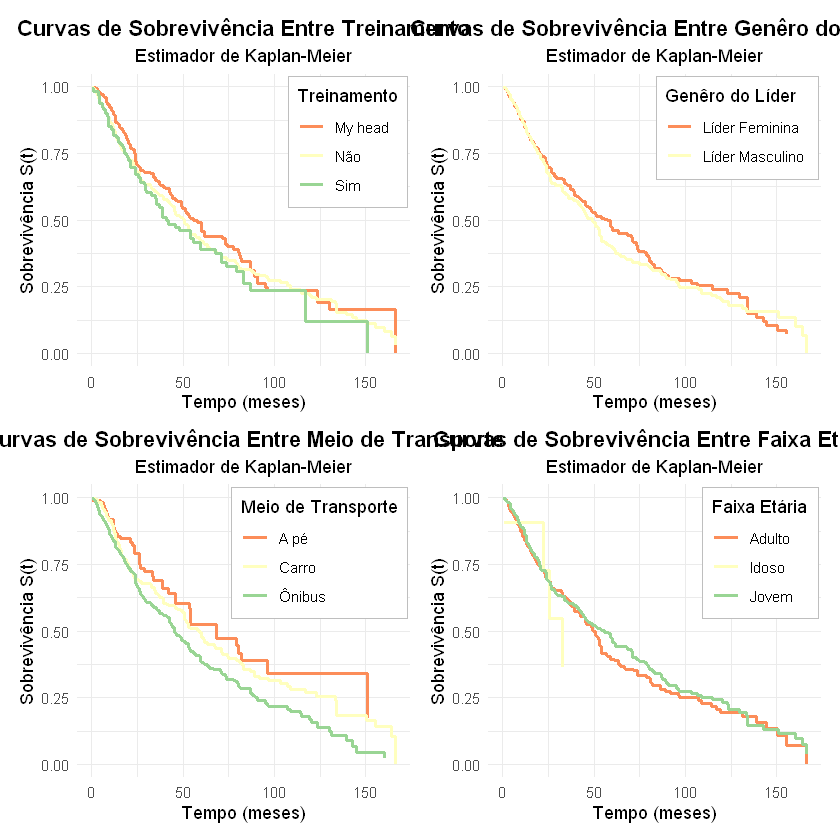

In [ ]:
# Curvas entre Treinamento

# Cria um objeto para acessar os dados
summary_km_fit_5 <- summary(km_fit_5)

# Extrai os dados necessários para plot
df_surv_km_fit_5 <- data.frame(tempo = summary_km_fit_5$time, sobrevivencia = summary_km_fit_5$surv, surv_lower = summary_km_fit_5$lower,
                              surv_upper = summary_km_fit_5$upper, grupo = summary_km_fit_5$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "treinador=yes" ~ "Sim", grupo == "treinador=no" ~ "Não", grupo == "treinador=my head" ~ "My head", TRUE ~ grupo))


# Gráfico
km_fit_5_plot <- ggplot(df_surv_km_fit_5, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Treinamento", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Treinamento", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Curvas entre Genêro do Líder

# Cria um objeto para acessar os dados
summary_km_fit_6 <- summary(km_fit_6)

# Extrai os dados necessários para plot
df_surv_km_fit_6 <- data.frame(tempo = summary_km_fit_6$time, sobrevivencia = summary_km_fit_6$surv, surv_lower = summary_km_fit_6$lower,
                              surv_upper = summary_km_fit_6$upper, grupo = summary_km_fit_6$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "genero_supervisor=f" ~ "Líder Feminina", grupo == "genero_supervisor=m" ~ "Líder Masculino", TRUE ~ grupo))


# Gráfico
km_fit_6_plot <- ggplot(df_surv_km_fit_6, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Genêro do Líder", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Genêro do Líder", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Curvas entre Meio de Transporte

# Cria um objeto para acessar os dados
summary_km_fit_7 <- summary(km_fit_7)

# Extrai os dados necessários para plot
df_surv_km_fit_7 <- data.frame(tempo = summary_km_fit_7$time, sobrevivencia = summary_km_fit_7$surv, surv_lower = summary_km_fit_7$lower,
                              surv_upper = summary_km_fit_7$upper, grupo = summary_km_fit_7$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "meio_transporte=bus" ~ "Ônibus", grupo == "meio_transporte=car" ~ "Carro", grupo == "meio_transporte=foot" ~ "A pé", TRUE ~ grupo))


# Gráfico
km_fit_7_plot <- ggplot(df_surv_km_fit_7, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Meio de Transporte", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Meio de Transporte", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Curvas entre Faixa Etária

# Cria um objeto para acessar os dados
summary_km_fit_8 <- summary(km_fit_8)

# Extrai os dados necessários para plot
df_surv_km_fit_8 <- data.frame(tempo = summary_km_fit_8$time, sobrevivencia = summary_km_fit_8$surv, surv_lower = summary_km_fit_8$lower,
                              surv_upper = summary_km_fit_8$upper, grupo = summary_km_fit_8$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "idade_categorizada=Adulto" ~ "Adulto", grupo == "idade_categorizada=Idoso" ~ "Idoso", grupo == "idade_categorizada=Jovem" ~ "Jovem", TRUE ~ grupo))


# Gráfico
km_fit_8_plot <- ggplot(df_surv_km_fit_8, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Faixa Etária", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Faixa Etária", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Esquema subplots
(km_fit_5_plot + km_fit_6_plot) / (km_fit_7_plot + km_fit_8_plot)

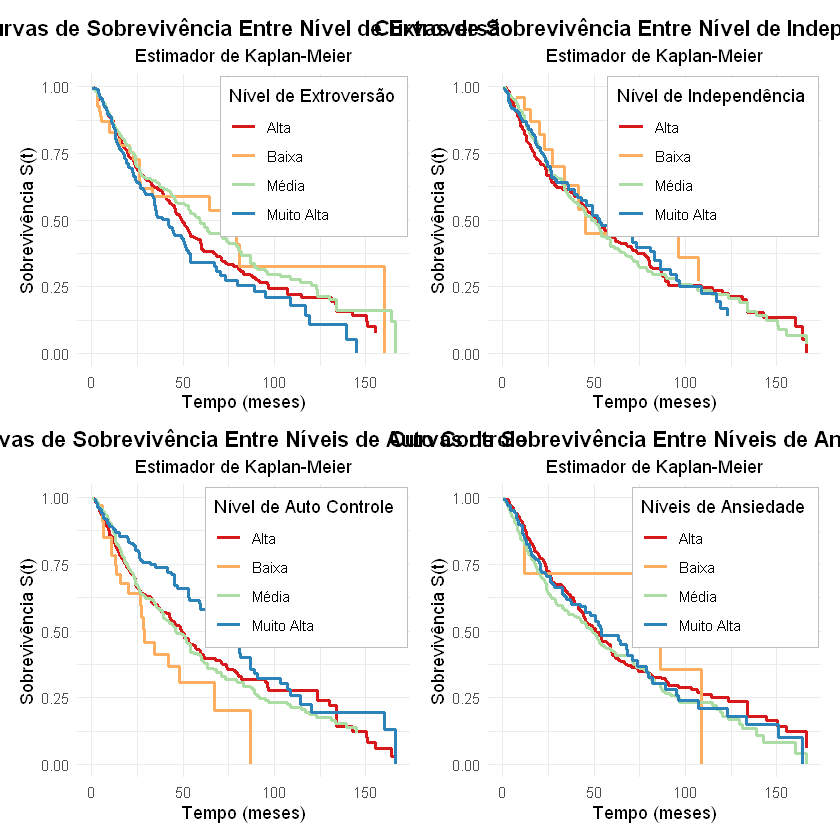

In [ ]:
# Curvas entre Nível de Extroversão

# Cria um objeto para acessar os dados
summary_km_fit_9 <- summary(km_fit_9)

# Extrai os dados necessários para plot
df_surv_km_fit_9 <- data.frame(tempo = summary_km_fit_9$time, sobrevivencia = summary_km_fit_9$surv, surv_lower = summary_km_fit_9$lower,
                              surv_upper = summary_km_fit_9$upper, grupo = summary_km_fit_9$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "extroversao_categorizada=Alta" ~ "Alta", grupo == "extroversao_categorizada=Baixa" ~ "Baixa",
                          grupo == "extroversao_categorizada=Média" ~ "Média", grupo == "extroversao_categorizada=Muito alta" ~ "Muito Alta", TRUE ~ grupo))


# Gráfico
km_fit_9_plot <- ggplot(df_surv_km_fit_9, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Nível de Extroversão", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Nível de Extroversão", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())


# Curvas entre Nível de Independência

# Cria um objeto para acessar os dados
summary_km_fit_10 <- summary(km_fit_10)

# Extrai os dados necessários para plot
df_surv_km_fit_10 <- data.frame(tempo = summary_km_fit_10$time, sobrevivencia = summary_km_fit_10$surv, surv_lower = summary_km_fit_10$lower,
                              surv_upper = summary_km_fit_10$upper, grupo = summary_km_fit_10$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "independencia_categorizada=Alta" ~ "Alta", grupo == "independencia_categorizada=Baixa" ~ "Baixa",
                          grupo == "independencia_categorizada=Média" ~ "Média", grupo == "independencia_categorizada=Muito alta" ~ "Muito Alta", TRUE ~ grupo))


# Gráfico
km_fit_10_plot <- ggplot(df_surv_km_fit_10, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Nível de Independência", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Nível de Independência", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())


# Curvas entre Nível de Auto Controle

# Cria um objeto para acessar os dados
summary_km_fit_11 <- summary(km_fit_11)

# Extrai os dados necessários para plot
df_surv_km_fit_11 <- data.frame(tempo = summary_km_fit_11$time, sobrevivencia = summary_km_fit_11$surv, surv_lower = summary_km_fit_11$lower,
                              surv_upper = summary_km_fit_11$upper, grupo = summary_km_fit_11$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "auto_controle_categorizado=Alta" ~ "Alta", grupo == "auto_controle_categorizado=Baixa" ~ "Baixa",
                          grupo == "auto_controle_categorizado=Média" ~ "Média", grupo == "auto_controle_categorizado=Muito alta" ~ "Muito Alta", TRUE ~ grupo))


# Gráfico
km_fit_11_plot <- ggplot(df_surv_km_fit_11, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Nível de Auto Controle", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Níveis de Auto Controle", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Curvas entre Níveis de Ansiedade

# Cria um objeto para acessar os dados
summary_km_fit_12 <- summary(km_fit_12)

# Extrai os dados necessários para plot
df_surv_km_fit_12 <- data.frame(tempo = summary_km_fit_12$time, sobrevivencia = summary_km_fit_12$surv, surv_lower = summary_km_fit_12$lower,
                              surv_upper = summary_km_fit_12$upper, grupo = summary_km_fit_12$strata) %>%

  # Substirui valores na colunas 'Grupo'
  mutate(grupo = case_when(grupo == "ansiedade_categorizada=Alta" ~ "Alta", grupo == "ansiedade_categorizada=Baixa" ~ "Baixa",
                          grupo == "ansiedade_categorizada=Média" ~ "Média", grupo == "ansiedade_categorizada=Muito alta" ~ "Muito Alta", TRUE ~ grupo))

# Gráfico
km_fit_12_plot <- ggplot(df_surv_km_fit_12, aes(x = tempo, fill = grupo)) +

    # Curva de sobrevivência
    geom_step(aes(y = sobrevivencia, color = grupo), size = 0.9) +

    # Paleta
    scale_color_brewer(name = "Níveis de Ansiedade", palette = "Spectral") +

    # Títulos
    labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Entre Níveis de Ansiedade", subtitle = "Estimador de Kaplan-Meier") +

    # Tema
    theme_minimal() +

    # Personalização
    theme(

        # Posição do título
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
        legend.position = c(0.99, 0.99),
        legend.justification = c("right", "top"),
        legend.direction = "vertical",
        legend.box = "vertical",

        # Fundo branco e borda da legenda
        legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
        legend.box.background = element_blank())

# Esquema subplots
(km_fit_9_plot + km_fit_10_plot) / (km_fit_11_plot + km_fit_12_plot)

## Regressões

### Covariáveis usadas

In [ ]:
# Lista com os nomes das 12 covariáveis
covariaveis <- c('genero', 'idade_categorizada', 'meio_transporte', 'mercado', 'cargo', 'recrutamento', 'treinador', 'genero_supervisor', 'extroversao_categorizada', 'independencia_categorizada', 'auto_controle_categorizado', 'ansiedade_categorizada')
covariaveis <- covariaveis[1:3]

### Paramétricas

#### Exponencial

In [ ]:
# Estimando as regressões

# Lista para armazenar os modelos
lista_modelos_exp <- list()
lista_variaveis_exp <- list()

# Contador de modelos
contador <- 1

# Loop para gerar todas as combinações possíveis
for (k in 1:length(covariaveis)) {

    # Todas as combinações de covariáveis
    combinacoes <- combn(covariaveis, k, simplify = FALSE)

    # Loop que aplica a combinação e estima a regressão paramétricas
    for (vars in combinacoes) {

        # Define a "configuração" do modelo
        formula_modelo <- as.formula(paste("surv_obj ~", paste(vars, collapse = " + ")))

        # Estima o modelo
        modelo <- flexsurvreg(formula_modelo, data = df_para_reg, dist = "exp")

        # Armazena na lista de estimação
        lista_modelos_exp[[contador]] <- modelo

        # Armazena na lista de variavies usadas
        lista_variaveis_exp[[contador]] <- paste(vars, collapse = ", ")

        # Renomeia o modelo
        names(lista_modelos_exp)[contador] <- paste0("modelo_", contador)

        # Contador de modeloa
        contador <- contador + 1
    }
}

# Transforma cada item da lista de variáveis usadas em um vetor de variáveis
lista_variaveis_exp <- lapply(lista_variaveis_exp, function(x) trimws(unlist(strsplit(x, ","))))

In [ ]:
# Extraindo AIC e BIC

# Cria um data frame vazio para armazenar os resultados
df_aic_bic <- data.frame(
    Modelo_ID = character(),
    Variaveis = character(),
    AIC = numeric())

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_exp)) {

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_exp[[i]]

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_exp[i])

    # Obtém as variáveis usadas na estimação
    variavies <- lista_variaveis_exp[[i]]
    nome_vari <- paste(paste(variavies, collapse = " + "))

    # Obtém AIC do modelo
    AIC <- modelo$AIC

    # Define uma nova linha
    nova_linha <- data.frame(Modelo_ID = ID, Variaveis = nome_vari, AIC = AIC)

    # Adicionar a linha no data frame
    df_aic_bic <- rbind(df_aic_bic, nova_linha)}

# Organiza pelo AIC (menor para o maior)
df_ordem_aic <- df_aic_bic %>% arrange(AIC); df_ordem_aic

Modelo_ID,Variaveis,AIC
<chr>,<chr>,<dbl>
modelo_3,meio_transporte,5921.614
modelo_5,genero + meio_transporte,5922.275
modelo_6,idade_categorizada + meio_transporte,5924.479
modelo_7,genero + idade_categorizada + meio_transporte,5925.109
modelo_1,genero,5929.744
modelo_2,idade_categorizada,5932.529
modelo_4,genero + idade_categorizada,5932.732


In [ ]:
#################################################
############### COLOCAR O BIC ###################
#################################################
############## FAZER O TRV DE: ##################
#### MELHOR MODELO AIC VS MELHOR MODELO BIC #####
#################################################

In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_TRV_exp <- data.frame(Comparacao = character(), Variaveis = character(), LR_stat = numeric(), p_value = numeric())

# Loop para preencher o data frame vazio
for (i in 1:(length(lista_modelos_exp))) {
    for (j in 1:(length(lista_modelos_exp))){

        # Obtém as variaveis usadas em cada modelo
        vars_i <- lista_variaveis_exp[[i]]
        vars_j <- lista_variaveis_exp[[j]]

        # Verifica se modelo i é aninhado em j e tem menos parâmetros
        if (all(vars_i %in% vars_j) && length(vars_i) < length(vars_j)) {
            modelo_1 <- lista_modelos_exp[[i]]
            modelo_2 <- lista_modelos_exp[[j]]

            # TRV - agora captura ambos os valores
            resultado_TRV <- TRV(modelo_1, modelo_2)

            # Obtém o nome do objeto flexsurvreg
            ID_1 <- names(lista_modelos_exp)[i]
            ID_2 <- names(lista_modelos_exp)[j]
            nome_TRV <- paste(ID_1, ID_2, sep = " vs ")

            # Obtém as variáveis usadas na estimação
            variaveis_1 <- lista_variaveis_exp[[i]]
            variaveis_2 <- lista_variaveis_exp[[j]]
            nome_vari <- paste(paste(variaveis_1, collapse = " + "), paste(variaveis_2, collapse = " + "), sep = " vs ")

            # Define uma nova linha com ambas as estatísticas
            nova_linha <- data.frame(Comparacao = nome_TRV, Variaveis = nome_vari, LR_stat = resultado_TRV["LR_stat"], p_value = resultado_TRV["p_value"])

            # Adicionar a linha no data frame
            df_TRV_exp <- bind_rows(df_TRV_exp, nova_linha) %>%

                # Retira a indexação
                `rownames<-`(NULL)}
        else {next}
    }
};

# Obtendo a decisao sobre o TRV
df_TRV_exp <- df_TRV_exp %>%

                # Decisão sobre o teste de hipótese (TRV)
                mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'), Interpratação = ifelse(p_value <= 0.05, 'O modelo mais complexo possui um melhor ajuste', 'O modelo mais simples é suficiente')); df_TRV_exp

Comparacao,Variaveis,LR_stat,p_value,Decisao,Interpratação
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
modelo_1 vs modelo_4,genero vs genero + idade_categorizada,1.0122,0.6028,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_1 vs modelo_5,genero vs genero + meio_transporte,11.4685,0.0032,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_1 vs modelo_7,genero vs genero + idade_categorizada + meio_transporte,12.6353,0.0132,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_4,idade_categorizada vs genero + idade_categorizada,1.7974,0.1800,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_2 vs modelo_6,idade_categorizada vs idade_categorizada + meio_transporte,12.0500,0.0024,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_7,idade_categorizada vs genero + idade_categorizada + meio_transporte,13.4205,0.0038,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_3 vs modelo_5,meio_transporte vs genero + meio_transporte,1.3391,0.2472,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_6,meio_transporte vs idade_categorizada + meio_transporte,1.1354,0.5668,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_7,meio_transporte vs genero + idade_categorizada + meio_transporte,2.5059,0.4742,Não se rejeita H_0,O modelo mais simples é suficiente


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_surv_exp <- data.frame(Tempo = km_fit$time)

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_exp)) {

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_exp[i])

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_exp[[i]]

    # Obtém o S(t) do modelo
    surv <- extrair_surv(modelo)

    # Define uma nova coluna
    nova_coluna <- data.frame(ID = surv)

    # Adicionar a coluna no data frame
    df_surv_exp <- cbind(df_surv_exp, nova_coluna)
}

In [ ]:
# Gráfico
# ggplot(df_reg_exp, aes(x = Tempo)) +
#
    # Linhas de sobrevivência
#     geom_line(aes(y = S, color = Modelo)) +
#
    # Títulos
#     labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Paramétricas", subtitle = "Modelo Exponencial") +

    # Tema
#     theme_minimal() +

    # Personalização
#     theme(

        # Posição do título
#         plot.title = element_text(hjust = 0.5, face = "bold"),
#         plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
#         legend.position = c(0.99, 0.99),
#         legend.justification = c("right", "top"),
#         legend.direction = "vertical",
#         legend.box = "vertical",

        # Fundo branco e borda da legenda
#         legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
#         legend.box.background = element_blank())

#### Weibull

In [ ]:
# Estimando as regressões

# Lista para armazenar os modelos
lista_modelos_weib <- list()
lista_variaveis_weib <- list()

# Contador de modelos
contador <- 1

# Loop para gerar todas as combinações possíveis
for (k in 1:length(covariaveis)) {

    # Todas as combinações de covariáveis
    combinacoes <- combn(covariaveis, k, simplify = FALSE)

    # Loop que aplica a combinação e estima a regressão paramétricas
    for (vars in combinacoes) {

        # Define a "configuração" do modelo
        formula_modelo <- as.formula(paste("surv_obj ~", paste(vars, collapse = " + ")))

        # Estima o modelo
        modelo <- flexsurvreg(formula_modelo, data = df_para_reg, dist = "weibull")

        # Armazena na lista de estimação
        lista_modelos_weib[[contador]] <- modelo

        # Armazena na lista de variavies usadas
        lista_variaveis_weib[[contador]] <- paste(vars, collapse = ", ")

        # Renomeia o modelo
        names(lista_modelos_weib)[contador] <- paste0("modelo_", contador)

        # Contador de modeloa
        contador <- contador + 1
    }
}

# Transforma cada item da lista de variáveis usadas em um vetor de variáveis
lista_variaveis_weib <- lapply(lista_variaveis_weib, function(x) trimws(unlist(strsplit(x, ","))))

In [ ]:
# Extraindo AIC e BIC

# Cria um data frame vazio para armazenar os resultados
df_aic_bic_wieb <- data.frame(
    Modelo_ID = character(),
    Variaveis = character(),
    AIC = numeric())

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_weib)) {

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_weib[[i]]

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_weib[i])

    # Obtém as variáveis usadas na estimação
    variavies <- lista_variaveis[[i]]
    nome_vari <- paste(paste(variavies, collapse = " + "))

    # Obtém AIC do modelo
    AIC <- modelo$AIC

    # Define uma nova linha
    nova_linha <- data.frame(Modelo_ID = ID, Variaveis = nome_vari, AIC = AIC)

    # Adicionar a linha no data frame
    df_aic_bic_wieb <- rbind(df_aic_bic_wieb, nova_linha)}

# Organiza pelo AIC (menor para o maior)
df_ordem_aic_wieb <- df_aic_bic_wieb %>% arrange(AIC); df_ordem_aic_wieb

Modelo_ID,Variaveis,AIC
<chr>,<chr>,<dbl>
modelo_3,meio_transporte,5918.604
modelo_5,genero + meio_transporte,5919.181
modelo_6,idade_categorizada + meio_transporte,5921.021
modelo_7,genero + idade_categorizada + meio_transporte,5921.567
modelo_1,genero,5927.585
modelo_2,idade_categorizada,5930.137
modelo_4,genero + idade_categorizada,5930.185


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_TRV_weib <- data.frame(Comparacao = character(), Variaveis = character(), LR_stat = numeric(), p_value = numeric())

# Loop para preencher o data frame vazio
for (i in 1:(length(lista_modelos_weib))) {
    for (j in 1:(length(lista_modelos_weib))){

        # Obtém as variaveis usadas em cada modelo
        vars_i <- lista_variaveis_weib[[i]]
        vars_j <- lista_variaveis_weib[[j]]

        # Verifica se modelo i é aninhado em j e tem menos parâmetros
        if (all(vars_i %in% vars_j) && length(vars_i) < length(vars_j)) {
            modelo_1 <- lista_modelos_weib[[i]]
            modelo_2 <- lista_modelos_weib[[j]]

            # TRV - agora captura ambos os valores
            resultado_TRV <- TRV(modelo_1, modelo_2)

            # Obtém o nome do objeto flexsurvreg
            ID_1 <- names(lista_modelos_weib)[i]
            ID_2 <- names(lista_modelos_weib)[j]
            nome_TRV <- paste(ID_1, ID_2, sep = " vs ")

            # Obtém as variáveis usadas na estimação
            variaveis_1 <- lista_variaveis_weib[[i]]
            variaveis_2 <- lista_variaveis_weib[[j]]
            nome_vari <- paste(paste(variaveis_1, collapse = " + "), paste(variaveis_2, collapse = " + "), sep = " vs ")

            # Define uma nova linha com ambas as estatísticas
            nova_linha <- data.frame(Comparacao = nome_TRV, Variaveis = nome_vari, LR_stat = resultado_TRV["LR_stat"], p_value = resultado_TRV["p_value"])

            # Adicionar a linha no data frame
            df_TRV_weib <- bind_rows(df_TRV_weib, nova_linha) %>%

                # Retira a indexação
                `rownames<-`(NULL)}
        else {next}
    }
};

# Obtendo a decisao sobre o TRV
df_TRV_weib <- df_TRV_weib %>%

                # Decisão sobre o teste de hipótese (TRV)
                mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'), Interpratação = ifelse(p_value <= 0.05, 'O modelo mais complexo possui um melhor ajuste', 'O modelo mais simples é suficiente')); df_TRV_exp

Comparacao,Variaveis,LR_stat,p_value,Decisao,Interpratação
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
modelo_1 vs modelo_4,genero vs genero + idade_categorizada,1.0122,0.6028,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_1 vs modelo_5,genero vs genero + meio_transporte,11.4685,0.0032,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_1 vs modelo_7,genero vs genero + idade_categorizada + meio_transporte,12.6353,0.0132,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_4,idade_categorizada vs genero + idade_categorizada,1.7974,0.1800,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_2 vs modelo_6,idade_categorizada vs idade_categorizada + meio_transporte,12.0500,0.0024,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_7,idade_categorizada vs genero + idade_categorizada + meio_transporte,13.4205,0.0038,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_3 vs modelo_5,meio_transporte vs genero + meio_transporte,1.3391,0.2472,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_6,meio_transporte vs idade_categorizada + meio_transporte,1.1354,0.5668,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_7,meio_transporte vs genero + idade_categorizada + meio_transporte,2.5059,0.4742,Não se rejeita H_0,O modelo mais simples é suficiente


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_surv_weib <- data.frame(Tempo = km_fit$time)

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_weib)) {

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_weib[i])

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_weib[[i]]

    # Obtém o S(t) do modelo
    surv <- extrair_surv(modelo)

    # Define uma nova coluna
    nova_coluna <- data.frame(ID = surv)

    # Adicionar a coluna no data frame
    df_surv_weib <- cbind(df_surv_weib, nova_coluna)
}

In [ ]:
# Gráfico
# ggplot(df_reg_exp, aes(x = Tempo)) +
#
    # Linhas de sobrevivência
#     geom_line(aes(y = S, color = Modelo)) +
#
    # Títulos
#     labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Paramétricas", subtitle = "Modelo Exponencial") +

    # Tema
#     theme_minimal() +

    # Personalização
#     theme(

        # Posição do título
#         plot.title = element_text(hjust = 0.5, face = "bold"),
#         plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
#         legend.position = c(0.99, 0.99),
#         legend.justification = c("right", "top"),
#         legend.direction = "vertical",
#         legend.box = "vertical",

        # Fundo branco e borda da legenda
#         legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
#         legend.box.background = element_blank())

#### Gompertz

In [ ]:
# Estimando as regressões

# Lista para armazenar os modelos
lista_modelos_gomp <- list()
lista_variaveis_gomp <- list()

# Contador de modelos
contador <- 1

# Loop para gerar todas as combinações possíveis
for (k in 1:length(covariaveis)) {

    # Todas as combinações de covariáveis
    combinacoes <- combn(covariaveis, k, simplify = FALSE)

    # Loop que aplica a combinação e estima a regressão paramétricas
    for (vars in combinacoes) {

        # Define a "configuração" do modelo
        formula_modelo <- as.formula(paste("surv_obj ~", paste(vars, collapse = " + ")))

        # Estima o modelo
        modelo <- flexsurvreg(formula_modelo, data = df_para_reg, dist = "gompertz")

        # Armazena na lista de estimação
        lista_modelos_gomp[[contador]] <- modelo

        # Armazena na lista de variavies usadas
        lista_variaveis_gomp[[contador]] <- paste(vars, collapse = ", ")

        # Renomeia o modelo
        names(lista_modelos_gomp)[contador] <- paste0("modelo_", contador)

        # Contador de modelos
        contador <- contador + 1
    }
}

# Transforma cada item da lista de variáveis usadas em um vetor de variáveis
lista_variaveis_gomp <- lapply(lista_variaveis_gomp, function(x) trimws(unlist(strsplit(x, ","))))

In [ ]:
# Extraindo AIC e BIC

# Cria um data frame vazio para armazenar os resultados
df_aic_bic_gomp <- data.frame(
    Modelo_ID = character(),
    Variaveis = character(),
    AIC = numeric())

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_gomp)) {

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_gomp[[i]]

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_gomp[i])

    # Obtém as variáveis usadas na estimação
    variavies <- lista_variaveis_gomp[[i]]
    nome_vari <- paste(paste(variavies, collapse = " + "))

    # Obtém AIC do modelo
    AIC <- modelo$AIC

    # Define uma nova linha
    nova_linha <- data.frame(Modelo_ID = ID, Variaveis = nome_vari, AIC = AIC)

    # Adicionar a linha no data frame
    df_aic_bic_gomp <- rbind(df_aic_bic_gomp, nova_linha)}

# Organiza pelo AIC (menor para o maior)
df_aic_bic_gomp <- df_aic_bic_gomp %>% arrange(AIC); df_aic_bic_gomp

Modelo_ID,Variaveis,AIC
<chr>,<chr>,<dbl>
modelo_3,meio_transporte,5922.745
modelo_5,genero + meio_transporte,5923.357
modelo_6,idade_categorizada + meio_transporte,5925.384
modelo_7,genero + idade_categorizada + meio_transporte,5925.960
modelo_1,genero,5931.289
modelo_2,idade_categorizada,5934.002
modelo_4,genero + idade_categorizada,5934.124


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_TRV_gomp <- data.frame(Comparacao = character(), Variaveis = character(), LR_stat = numeric(), p_value = numeric())

# Loop para preencher o data frame vazio
for (i in 1:(length(lista_modelos_gomp))) {
    for (j in 1:(length(lista_modelos_gomp))){

        # Obtém as variaveis usadas em cada modelo
        vars_i <- lista_variaveis_gomp[[i]]
        vars_j <- lista_variaveis_gomp[[j]]

        # Verifica se modelo i é aninhado em j e tem menos parâmetros
        if (all(vars_i %in% vars_j) && length(vars_i) < length(vars_j)) {
            modelo_1 <- lista_modelos_gomp[[i]]
            modelo_2 <- lista_modelos_gomp[[j]]

            # TRV - agora captura ambos os valores
            resultado_TRV <- TRV(modelo_1, modelo_2)

            # Obtém o nome do objeto flexsurvreg
            ID_1 <- names(lista_modelos_gomp)[i]
            ID_2 <- names(lista_modelos_gomp)[j]
            nome_TRV <- paste(ID_1, ID_2, sep = " vs ")

            # Obtém as variáveis usadas na estimação
            variaveis_1 <- lista_variaveis_gomp[[i]]
            variaveis_2 <- lista_variaveis_gomp[[j]]
            nome_vari <- paste(paste(variaveis_1, collapse = " + "), paste(variaveis_2, collapse = " + "), sep = " vs ")

            # Define uma nova linha com ambas as estatísticas
            nova_linha <- data.frame(Comparacao = nome_TRV, Variaveis = nome_vari, LR_stat = resultado_TRV["LR_stat"], p_value = resultado_TRV["p_value"])

            # Adicionar a linha no data frame
            df_TRV_gomp <- bind_rows(df_TRV_gomp, nova_linha) %>%

                # Retira a indexação
                `rownames<-`(NULL)}
        else {next}
    }
};

# Obtendo a decisao sobre o TRV
df_TRV_gomp <- df_TRV_gomp %>%

                # Decisão sobre o teste de hipótese (TRV)
                mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'), Interpratação = ifelse(p_value <= 0.05, 'O modelo mais complexo possui um melhor ajuste', 'O modelo mais simples é suficiente')); df_TRV_exp

Comparacao,Variaveis,LR_stat,p_value,Decisao,Interpratação
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
modelo_1 vs modelo_4,genero vs genero + idade_categorizada,1.0122,0.6028,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_1 vs modelo_5,genero vs genero + meio_transporte,11.4685,0.0032,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_1 vs modelo_7,genero vs genero + idade_categorizada + meio_transporte,12.6353,0.0132,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_4,idade_categorizada vs genero + idade_categorizada,1.7974,0.1800,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_2 vs modelo_6,idade_categorizada vs idade_categorizada + meio_transporte,12.0500,0.0024,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_7,idade_categorizada vs genero + idade_categorizada + meio_transporte,13.4205,0.0038,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_3 vs modelo_5,meio_transporte vs genero + meio_transporte,1.3391,0.2472,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_6,meio_transporte vs idade_categorizada + meio_transporte,1.1354,0.5668,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_7,meio_transporte vs genero + idade_categorizada + meio_transporte,2.5059,0.4742,Não se rejeita H_0,O modelo mais simples é suficiente


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_surv_gomp <- data.frame(Tempo = km_fit$time)

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_gomp)) {

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_gomp[i])

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_gomp[[i]]

    # Obtém o S(t) do modelo
    surv <- extrair_surv(modelo)

    # Define uma nova coluna
    nova_coluna <- data.frame(ID = surv)

    # Adicionar a coluna no data frame
    df_surv_gomp <- cbind(df_surv_gomp, nova_coluna)
}

In [ ]:
# Gráfico
# ggplot(df_reg_exp, aes(x = Tempo)) +
#
    # Linhas de sobrevivência
#     geom_line(aes(y = S, color = Modelo)) +
#
    # Títulos
#     labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Paramétricas", subtitle = "Modelo Exponencial") +

    # Tema
#     theme_minimal() +

    # Personalização
#     theme(

        # Posição do título
#         plot.title = element_text(hjust = 0.5, face = "bold"),
#         plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
#         legend.position = c(0.99, 0.99),
#         legend.justification = c("right", "top"),
#         legend.direction = "vertical",
#         legend.box = "vertical",

        # Fundo branco e borda da legenda
#         legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
#         legend.box.background = element_blank())

#### LogNormal

In [ ]:
# Estimando as regressões

# Lista para armazenar os modelos
lista_modelos_lnorm <- list()
lista_variaveis_lnorm <- list()

# Contador de modelos
contador <- 1

# Loop para gerar todas as combinações possíveis
for (k in 1:length(covariaveis)) {

    # Todas as combinações de covariáveis
    combinacoes <- combn(covariaveis, k, simplify = FALSE)

    # Loop que aplica a combinação e estima a regressão paramétricas
    for (vars in combinacoes) {

        # Define a "configuração" do modelo
        formula_modelo <- as.formula(paste("surv_obj ~", paste(vars, collapse = " + ")))

        # Estima o modelo
        modelo <- flexsurvreg(formula_modelo, data = df_para_reg, dist = "lnorm")

        # Armazena na lista de estimação
        lista_modelos_lnorm[[contador]] <- modelo

        # Armazena na lista de variavies usadas
        lista_variaveis_lnorm[[contador]] <- paste(vars, collapse = ", ")

        # Renomeia o modelo
        names(lista_modelos_lnorm)[contador] <- paste0("modelo_", contador)

        # Contador de modelos
        contador <- contador + 1
    }
}

# Transforma cada item da lista de variáveis usadas em um vetor de variáveis
lista_variaveis_lnorm <- lapply(lista_variaveis_lnorm, function(x) trimws(unlist(strsplit(x, ","))))

In [ ]:
# Extraindo AIC e BIC

# Cria um data frame vazio para armazenar os resultados
df_aic_bic_lnorm <- data.frame(
    Modelo_ID = character(),
    Variaveis = character(),
    AIC = numeric())

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_lnorm)) {

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_lnorm[[i]]

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_lnorm[i])

    # Obtém as variáveis usadas na estimação
    variavies <- lista_variaveis_lnorm[[i]]
    nome_vari <- paste(paste(variavies, collapse = " + "))

    # Obtém AIC do modelo
    AIC <- modelo$AIC

    # Define uma nova linha
    nova_linha <- data.frame(Modelo_ID = ID, Variaveis = nome_vari, AIC = AIC)

    # Adicionar a linha no data frame
    df_aic_bic_lnorm <- rbind(df_aic_bic_lnorm, nova_linha)}

# Organiza pelo AIC (menor para o maior)
df_aic_bic_lnorm <- df_aic_bic_lnorm %>% arrange(AIC); df_aic_bic_lnorm

Modelo_ID,Variaveis,AIC
<chr>,<chr>,<dbl>
modelo_3,meio_transporte,5919.566
modelo_5,genero + meio_transporte,5920.319
modelo_6,idade_categorizada + meio_transporte,5922.077
modelo_7,genero + idade_categorizada + meio_transporte,5922.703
modelo_1,genero,5927.166
modelo_2,idade_categorizada,5930.142
modelo_4,genero + idade_categorizada,5930.161


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_TRV_lnorm <- data.frame(Comparacao = character(), Variaveis = character(), LR_stat = numeric(), p_value = numeric())

# Loop para preencher o data frame vazio
for (i in 1:(length(lista_modelos_lnorm))) {
    for (j in 1:(length(lista_modelos_lnorm))){

        # Obtém as variaveis usadas em cada modelo
        vars_i <- lista_variaveis_lnorm[[i]]
        vars_j <- lista_variaveis_lnorm[[j]]

        # Verifica se modelo i é aninhado em j e tem menos parâmetros
        if (all(vars_i %in% vars_j) && length(vars_i) < length(vars_j)) {
            modelo_1 <- lista_modelos_lnorm[[i]]
            modelo_2 <- lista_modelos_lnorm[[j]]

            # TRV - agora captura ambos os valores
            resultado_TRV <- TRV(modelo_1, modelo_2)

            # Obtém o nome do objeto flexsurvreg
            ID_1 <- names(lista_modelos_lnorm)[i]
            ID_2 <- names(lista_modelos_lnorm)[j]
            nome_TRV <- paste(ID_1, ID_2, sep = " vs ")

            # Obtém as variáveis usadas na estimação
            variaveis_1 <- lista_variaveis_lnorm[[i]]
            variaveis_2 <- lista_variaveis_lnorm[[j]]
            nome_vari <- paste(paste(variaveis_1, collapse = " + "), paste(variaveis_2, collapse = " + "), sep = " vs ")

            # Define uma nova linha com ambas as estatísticas
            nova_linha <- data.frame(Comparacao = nome_TRV, Variaveis = nome_vari, LR_stat = resultado_TRV["LR_stat"], p_value = resultado_TRV["p_value"])

            # Adicionar a linha no data frame
            df_TRV_lnorm <- bind_rows(df_TRV_lnorm, nova_linha) %>%

                # Retira a indexação
                `rownames<-`(NULL)}
        else {next}
    }
};

# Obtendo a decisao sobre o TRV
df_TRV_lnorm <- df_TRV_lnorm %>%

                # Decisão sobre o teste de hipótese (TRV)
                mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'), Interpratação = ifelse(p_value <= 0.05, 'O modelo mais complexo possui um melhor ajuste', 'O modelo mais simples é suficiente')); df_TRV_exp

Comparacao,Variaveis,LR_stat,p_value,Decisao,Interpratação
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
modelo_1 vs modelo_4,genero vs genero + idade_categorizada,1.0122,0.6028,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_1 vs modelo_5,genero vs genero + meio_transporte,11.4685,0.0032,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_1 vs modelo_7,genero vs genero + idade_categorizada + meio_transporte,12.6353,0.0132,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_4,idade_categorizada vs genero + idade_categorizada,1.7974,0.1800,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_2 vs modelo_6,idade_categorizada vs idade_categorizada + meio_transporte,12.0500,0.0024,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_7,idade_categorizada vs genero + idade_categorizada + meio_transporte,13.4205,0.0038,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_3 vs modelo_5,meio_transporte vs genero + meio_transporte,1.3391,0.2472,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_6,meio_transporte vs idade_categorizada + meio_transporte,1.1354,0.5668,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_7,meio_transporte vs genero + idade_categorizada + meio_transporte,2.5059,0.4742,Não se rejeita H_0,O modelo mais simples é suficiente


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_surv_lnorm <- data.frame(Tempo = km_fit$time)

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_lnorm)) {

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_lnorm[i])

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_lnorm[[i]]

    # Obtém o S(t) do modelo
    surv <- extrair_surv(modelo)

    # Define uma nova coluna
    nova_coluna <- data.frame(ID = surv)

    # Adicionar a coluna no data frame
    df_surv_lnorm <- cbind(df_surv_lnorm, nova_coluna)
}

In [ ]:
# Gráfico
# ggplot(df_reg_exp, aes(x = Tempo)) +
#
    # Linhas de sobrevivência
#     geom_line(aes(y = S, color = Modelo)) +
#
    # Títulos
#     labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Paramétricas", subtitle = "Modelo Exponencial") +

    # Tema
#     theme_minimal() +

    # Personalização
#     theme(

        # Posição do título
#         plot.title = element_text(hjust = 0.5, face = "bold"),
#         plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
#         legend.position = c(0.99, 0.99),
#         legend.justification = c("right", "top"),
#         legend.direction = "vertical",
#         legend.box = "vertical",

        # Fundo branco e borda da legenda
#         legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
#         legend.box.background = element_blank())

#### LogLogistica

In [ ]:
# Estimando as regressões

# Lista para armazenar os modelos
lista_modelos_llogis <- list()
lista_variaveis_llogis <- list()

# Contador de modelos
contador <- 1

# Loop para gerar todas as combinações possíveis
for (k in 1:length(covariaveis)) {

    # Todas as combinações de covariáveis
    combinacoes <- combn(covariaveis, k, simplify = FALSE)

    # Loop que aplica a combinação e estima a regressão paramétricas
    for (vars in combinacoes) {

        # Define a "configuração" do modelo
        formula_modelo <- as.formula(paste("surv_obj ~", paste(vars, collapse = " + ")))

        # Estima o modelo
        modelo <- flexsurvreg(formula_modelo, data = df_para_reg, dist = "llogis")

        # Armazena na lista de estimação
        lista_modelos_llogis[[contador]] <- modelo

        # Armazena na lista de variavies usadas
        lista_variaveis_llogis[[contador]] <- paste(vars, collapse = ", ")

        # Renomeia o modelo
        names(lista_modelos_llogis)[contador] <- paste0("modelo_", contador)

        # Contador de modelos
        contador <- contador + 1
    }
}

# Transforma cada item da lista de variáveis usadas em um vetor de variáveis
lista_variaveis_llogis <- lapply(lista_variaveis_llogis, function(x) trimws(unlist(strsplit(x, ","))))

In [ ]:
# Extraindo AIC e BIC

# Cria um data frame vazio para armazenar os resultados
df_aic_bic_llogis <- data.frame(
    Modelo_ID = character(),
    Variaveis = character(),
    AIC = numeric())

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_llogis)) {

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_llogis[[i]]

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_llogis[i])

    # Obtém as variáveis usadas na estimação
    variavies <- lista_variaveis_llogis[[i]]
    nome_vari <- paste(paste(variavies, collapse = " + "))

    # Obtém AIC do modelo
    AIC <- modelo$AIC

    # Define uma nova linha
    nova_linha <- data.frame(Modelo_ID = ID, Variaveis = nome_vari, AIC = AIC)

    # Adicionar a linha no data frame
    df_aic_bic_llogis <- rbind(df_aic_bic_llogis, nova_linha)}

# Organiza pelo AIC (menor para o maior)
df_aic_bic_llogis <- df_aic_bic_llogis %>% arrange(AIC); df_aic_bic_llogis

Modelo_ID,Variaveis,AIC
<chr>,<chr>,<dbl>
modelo_3,meio_transporte,5920.570
modelo_5,genero + meio_transporte,5920.654
modelo_7,genero + idade_categorizada + meio_transporte,5923.360
modelo_6,idade_categorizada + meio_transporte,5923.457
modelo_1,genero,5926.355
modelo_4,genero + idade_categorizada,5929.435
modelo_2,idade_categorizada,5930.157


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_TRV_llogis <- data.frame(Comparacao = character(), Variaveis = character(), LR_stat = numeric(), p_value = numeric())

# Loop para preencher o data frame vazio
for (i in 1:(length(lista_modelos_llogis))) {
    for (j in 1:(length(lista_modelos_llogis))){

        # Obtém as variaveis usadas em cada modelo
        vars_i <- lista_variaveis_llogis[[i]]
        vars_j <- lista_variaveis_llogis[[j]]

        # Verifica se modelo i é aninhado em j e tem menos parâmetros
        if (all(vars_i %in% vars_j) && length(vars_i) < length(vars_j)) {
            modelo_1 <- lista_modelos_llogis[[i]]
            modelo_2 <- lista_modelos_llogis[[j]]

            # TRV - agora captura ambos os valores
            resultado_TRV <- TRV(modelo_1, modelo_2)

            # Obtém o nome do objeto flexsurvreg
            ID_1 <- names(lista_modelos_llogis)[i]
            ID_2 <- names(lista_modelos_llogis)[j]
            nome_TRV <- paste(ID_1, ID_2, sep = " vs ")

            # Obtém as variáveis usadas na estimação
            variaveis_1 <- lista_variaveis_llogis[[i]]
            variaveis_2 <- lista_variaveis_llogis[[j]]
            nome_vari <- paste(paste(variaveis_1, collapse = " + "), paste(variaveis_2, collapse = " + "), sep = " vs ")

            # Define uma nova linha com ambas as estatísticas
            nova_linha <- data.frame(Comparacao = nome_TRV, Variaveis = nome_vari, LR_stat = resultado_TRV["LR_stat"], p_value = resultado_TRV["p_value"])

            # Adicionar a linha no data frame
            df_TRV_llogis <- bind_rows(df_TRV_llogis, nova_linha) %>%

                # Retira a indexação
                `rownames<-`(NULL)}
        else {next}
    }
};

# Obtendo a decisao sobre o TRV
df_TRV_llogis <- df_TRV_llogis %>%

                # Decisão sobre o teste de hipótese (TRV)
                mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'), Interpratação = ifelse(p_value <= 0.05, 'O modelo mais complexo possui um melhor ajuste', 'O modelo mais simples é suficiente')); df_TRV_exp

Comparacao,Variaveis,LR_stat,p_value,Decisao,Interpratação
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
modelo_1 vs modelo_4,genero vs genero + idade_categorizada,1.0122,0.6028,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_1 vs modelo_5,genero vs genero + meio_transporte,11.4685,0.0032,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_1 vs modelo_7,genero vs genero + idade_categorizada + meio_transporte,12.6353,0.0132,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_4,idade_categorizada vs genero + idade_categorizada,1.7974,0.1800,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_2 vs modelo_6,idade_categorizada vs idade_categorizada + meio_transporte,12.0500,0.0024,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_7,idade_categorizada vs genero + idade_categorizada + meio_transporte,13.4205,0.0038,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_3 vs modelo_5,meio_transporte vs genero + meio_transporte,1.3391,0.2472,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_6,meio_transporte vs idade_categorizada + meio_transporte,1.1354,0.5668,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_7,meio_transporte vs genero + idade_categorizada + meio_transporte,2.5059,0.4742,Não se rejeita H_0,O modelo mais simples é suficiente


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_surv_llogis <- data.frame(Tempo = km_fit$time)

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_llogis)) {

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_llogis[i])

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_llogis[[i]]

    # Obtém o S(t) do modelo
    surv <- extrair_surv(modelo)

    # Define uma nova coluna
    nova_coluna <- data.frame(ID = surv)

    # Adicionar a coluna no data frame
    df_surv_llogis <- cbind(df_surv_llogis, nova_coluna)
}

In [ ]:
# Gráfico
# ggplot(df_reg_exp, aes(x = Tempo)) +
#
    # Linhas de sobrevivência
#     geom_line(aes(y = S, color = Modelo)) +
#
    # Títulos
#     labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Paramétricas", subtitle = "Modelo Exponencial") +

    # Tema
#     theme_minimal() +

    # Personalização
#     theme(

        # Posição do título
#         plot.title = element_text(hjust = 0.5, face = "bold"),
#         plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
#         legend.position = c(0.99, 0.99),
#         legend.justification = c("right", "top"),
#         legend.direction = "vertical",
#         legend.box = "vertical",

        # Fundo branco e borda da legenda
#         legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
#         legend.box.background = element_blank())

#### Gamma

In [ ]:
# Estimando as regressões

# Lista para armazenar os modelos
lista_modelos_gam <- list()
lista_variaveis_gam <- list()

# Contador de modelos
contador <- 1

# Loop para gerar todas as combinações possíveis
for (k in 1:length(covariaveis)) {

    # Todas as combinações de covariáveis
    combinacoes <- combn(covariaveis, k, simplify = FALSE)

    # Loop que aplica a combinação e estima a regressão paramétricas
    for (vars in combinacoes) {

        # Define a "configuração" do modelo
        formula_modelo <- as.formula(paste("surv_obj ~", paste(vars, collapse = " + ")))

        # Estima o modelo
        modelo <- flexsurvreg(formula_modelo, data = df_para_reg, dist = "gamma")

        # Armazena na lista de estimação
        lista_modelos_gam[[contador]] <- modelo

        # Armazena na lista de variavies usadas
        lista_variaveis_gam[[contador]] <- paste(vars, collapse = ", ")

        # Renomeia o modelo
        names(lista_modelos_gam)[contador] <- paste0("modelo_", contador)

        # Contador de modelos
        contador <- contador + 1
    }
}

# Transforma cada item da lista de variáveis usadas em um vetor de variáveis
lista_variaveis_gam <- lapply(lista_variaveis_gam, function(x) trimws(unlist(strsplit(x, ","))))

Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale = 1/rate, lower.tail = TRUE, :
"NaNs produzidos"
Warning message in (function (q, shape, rate = 1, scale

In [ ]:
# Extraindo AIC e BIC

# Cria um data frame vazio para armazenar os resultados
df_aic_bic_gam <- data.frame(
    Modelo_ID = character(),
    Variaveis = character(),
    AIC = numeric())

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_gam)) {

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_gam[[i]]

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_gam[i])

    # Obtém as variáveis usadas na estimação
    variavies <- lista_variaveis_gam[[i]]
    nome_vari <- paste(paste(variavies, collapse = " + "))

    # Obtém AIC do modelo
    AIC <- modelo$AIC

    # Define uma nova linha
    nova_linha <- data.frame(Modelo_ID = ID, Variaveis = nome_vari, AIC = AIC)

    # Adicionar a linha no data frame
    df_aic_bic_gam <- rbind(df_aic_bic_gam, nova_linha)}

# Organiza pelo AIC (menor para o maior)
df_aic_bic_gam <- df_aic_bic_gam %>% arrange(AIC); df_aic_bic_gam

Modelo_ID,Variaveis,AIC
<chr>,<chr>,<dbl>
modelo_3,meio_transporte,5916.343
modelo_5,genero + meio_transporte,5916.875
modelo_6,idade_categorizada + meio_transporte,5918.717
modelo_7,genero + idade_categorizada + meio_transporte,5919.206
modelo_1,genero,5925.332
modelo_4,genero + idade_categorizada,5927.893
modelo_2,idade_categorizada,5927.914


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_TRV_gam <- data.frame(Comparacao = character(), Variaveis = character(), LR_stat = numeric(), p_value = numeric())

# Loop para preencher o data frame vazio
for (i in 1:(length(lista_modelos_gam))) {
    for (j in 1:(length(lista_modelos_gam))){

        # Obtém as variaveis usadas em cada modelo
        vars_i <- lista_variaveis_gam[[i]]
        vars_j <- lista_variaveis_gam[[j]]

        # Verifica se modelo i é aninhado em j e tem menos parâmetros
        if (all(vars_i %in% vars_j) && length(vars_i) < length(vars_j)) {
            modelo_1 <- lista_modelos_gam[[i]]
            modelo_2 <- lista_modelos_gam[[j]]

            # TRV - agora captura ambos os valores
            resultado_TRV <- TRV(modelo_1, modelo_2)

            # Obtém o nome do objeto flexsurvreg
            ID_1 <- names(lista_modelos_gam)[i]
            ID_2 <- names(lista_modelos_gam)[j]
            nome_TRV <- paste(ID_1, ID_2, sep = " vs ")

            # Obtém as variáveis usadas na estimação
            variaveis_1 <- lista_variaveis_gam[[i]]
            variaveis_2 <- lista_variaveis_gam[[j]]
            nome_vari <- paste(paste(variaveis_1, collapse = " + "), paste(variaveis_2, collapse = " + "), sep = " vs ")

            # Define uma nova linha com ambas as estatísticas
            nova_linha <- data.frame(Comparacao = nome_TRV, Variaveis = nome_vari, LR_stat = resultado_TRV["LR_stat"], p_value = resultado_TRV["p_value"])

            # Adicionar a linha no data frame
            df_TRV_gam <- bind_rows(df_TRV_gam, nova_linha) %>%

                # Retira a indexação
                `rownames<-`(NULL)}
        else {next}
    }
};

# Obtendo a decisao sobre o TRV
df_TRV_gam <- df_TRV_gam %>%

                # Decisão sobre o teste de hipótese (TRV)
                mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'), Interpratação = ifelse(p_value <= 0.05, 'O modelo mais complexo possui um melhor ajuste', 'O modelo mais simples é suficiente')); df_TRV_exp

Comparacao,Variaveis,LR_stat,p_value,Decisao,Interpratação
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
modelo_1 vs modelo_4,genero vs genero + idade_categorizada,1.0122,0.6028,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_1 vs modelo_5,genero vs genero + meio_transporte,11.4685,0.0032,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_1 vs modelo_7,genero vs genero + idade_categorizada + meio_transporte,12.6353,0.0132,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_4,idade_categorizada vs genero + idade_categorizada,1.7974,0.1800,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_2 vs modelo_6,idade_categorizada vs idade_categorizada + meio_transporte,12.0500,0.0024,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_7,idade_categorizada vs genero + idade_categorizada + meio_transporte,13.4205,0.0038,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_3 vs modelo_5,meio_transporte vs genero + meio_transporte,1.3391,0.2472,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_6,meio_transporte vs idade_categorizada + meio_transporte,1.1354,0.5668,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_7,meio_transporte vs genero + idade_categorizada + meio_transporte,2.5059,0.4742,Não se rejeita H_0,O modelo mais simples é suficiente


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_surv_gam <- data.frame(Tempo = km_fit$time)

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_gam)) {

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_gam[i])

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_gam[[i]]

    # Obtém o S(t) do modelo
    surv <- extrair_surv(modelo)

    # Define uma nova coluna
    nova_coluna <- data.frame(ID = surv)

    # Adicionar a coluna no data frame
    df_surv_gam <- cbind(df_surv_gam, nova_coluna)
}

In [ ]:
# Gráfico
# ggplot(df_reg_exp, aes(x = Tempo)) +
#
    # Linhas de sobrevivência
#     geom_line(aes(y = S, color = Modelo)) +
#
    # Títulos
#     labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Paramétricas", subtitle = "Modelo Exponencial") +

    # Tema
#     theme_minimal() +

    # Personalização
#     theme(

        # Posição do título
#         plot.title = element_text(hjust = 0.5, face = "bold"),
#         plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
#         legend.position = c(0.99, 0.99),
#         legend.justification = c("right", "top"),
#         legend.direction = "vertical",
#         legend.box = "vertical",

        # Fundo branco e borda da legenda
#         legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
#         legend.box.background = element_blank())

#### Gamma Generalizada

In [ ]:
# Estimando as regressões

# Lista para armazenar os modelos
lista_modelos_gamgen <- list()
lista_variaveis_gamgen <- list()

# Contador de modelos
contador <- 1

# Loop para gerar todas as combinações possíveis
for (k in 1:length(covariaveis)) {

    # Todas as combinações de covariáveis
    combinacoes <- combn(covariaveis, k, simplify = FALSE)

    # Loop que aplica a combinação e estima a regressão paramétricas
    for (vars in combinacoes) {

        # Define a "configuração" do modelo
        formula_modelo <- as.formula(paste("surv_obj ~", paste(vars, collapse = " + ")))

        # Estima o modelo
        modelo <- flexsurvreg(formula_modelo, data = df_para_reg, dist = "gengamma")

        # Armazena na lista de estimação
        lista_modelos_gamgen[[contador]] <- modelo

        # Armazena na lista de variavies usadas
        lista_variaveis_gamgen[[contador]] <- paste(vars, collapse = ", ")

        # Renomeia o modelo
        names(lista_modelos_gamgen)[contador] <- paste0("modelo_", contador)

        # Contador de modelos
        contador <- contador + 1
    }
}

# Transforma cada item da lista de variáveis usadas em um vetor de variáveis
lista_variaveis_gamgen <- lapply(lista_variaveis_gamgen, function(x) trimws(unlist(strsplit(x, ","))))

In [ ]:
# Extraindo AIC e BIC

# Cria um data frame vazio para armazenar os resultados
df_aic_bic_gamgen <- data.frame(
    Modelo_ID = character(),
    Variaveis = character(),
    AIC = numeric())

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_gamgen)) {

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_gamgen[[i]]

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_gamgen[i])

    # Obtém as variáveis usadas na estimação
    variavies <- lista_variaveis_gamgen[[i]]
    nome_vari <- paste(paste(variavies, collapse = " + "))

    # Obtém AIC do modelo
    AIC <- modelo$AIC

    # Define uma nova linha
    nova_linha <- data.frame(Modelo_ID = ID, Variaveis = nome_vari, AIC = AIC)

    # Adicionar a linha no data frame
    df_aic_bic_gamgen <- rbind(df_aic_bic_gamgen, nova_linha)}

# Organiza pelo AIC (menor para o maior)
df_aic_bic_gamgen <- df_aic_bic_gamgen %>% arrange(AIC); df_aic_bic_gamgen

Modelo_ID,Variaveis,AIC
<chr>,<chr>,<dbl>
modelo_3,meio_transporte,5908.890
modelo_5,genero + meio_transporte,5909.377
modelo_6,idade_categorizada + meio_transporte,5911.543
modelo_7,genero + idade_categorizada + meio_transporte,5911.927
modelo_1,genero,5916.774
modelo_4,genero + idade_categorizada,5919.709
modelo_2,idade_categorizada,5919.856


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_TRV_gamgen <- data.frame(Comparacao = character(), Variaveis = character(), LR_stat = numeric(), p_value = numeric())

# Loop para preencher o data frame vazio
for (i in 1:(length(lista_modelos_gamgen))) {
    for (j in 1:(length(lista_modelos_gamgen))){

        # Obtém as variaveis usadas em cada modelo
        vars_i <- lista_variaveis_gamgen[[i]]
        vars_j <- lista_variaveis_gamgen[[j]]

        # Verifica se modelo i é aninhado em j e tem menos parâmetros
        if (all(vars_i %in% vars_j) && length(vars_i) < length(vars_j)) {
            modelo_1 <- lista_modelos_gamgen[[i]]
            modelo_2 <- lista_modelos_gamgen[[j]]

            # TRV - agora captura ambos os valores
            resultado_TRV <- TRV(modelo_1, modelo_2)

            # Obtém o nome do objeto flexsurvreg
            ID_1 <- names(lista_modelos_gamgen)[i]
            ID_2 <- names(lista_modelos_gamgen)[j]
            nome_TRV <- paste(ID_1, ID_2, sep = " vs ")

            # Obtém as variáveis usadas na estimação
            variaveis_1 <- lista_variaveis_gamgen[[i]]
            variaveis_2 <- lista_variaveis_gamgen[[j]]
            nome_vari <- paste(paste(variaveis_1, collapse = " + "), paste(variaveis_2, collapse = " + "), sep = " vs ")

            # Define uma nova linha com ambas as estatísticas
            nova_linha <- data.frame(Comparacao = nome_TRV, Variaveis = nome_vari, LR_stat = resultado_TRV["LR_stat"], p_value = resultado_TRV["p_value"])

            # Adicionar a linha no data frame
            df_TRV_gamgen <- bind_rows(df_TRV_gamgen, nova_linha) %>%

                # Retira a indexação
                `rownames<-`(NULL)}
        else {next}
    }
};

# Obtendo a decisao sobre o TRV
df_TRV_gamgen <- df_TRV_gamgen %>%

                # Decisão sobre o teste de hipótese (TRV)
                mutate(Decisao = ifelse(p_value <= 0.05, 'Rejeita-se H_0', 'Não se rejeita H_0'), Interpratação = ifelse(p_value <= 0.05, 'O modelo mais complexo possui um melhor ajuste', 'O modelo mais simples é suficiente')); df_TRV_exp

Comparacao,Variaveis,LR_stat,p_value,Decisao,Interpratação
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
modelo_1 vs modelo_4,genero vs genero + idade_categorizada,1.0122,0.6028,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_1 vs modelo_5,genero vs genero + meio_transporte,11.4685,0.0032,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_1 vs modelo_7,genero vs genero + idade_categorizada + meio_transporte,12.6353,0.0132,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_4,idade_categorizada vs genero + idade_categorizada,1.7974,0.1800,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_2 vs modelo_6,idade_categorizada vs idade_categorizada + meio_transporte,12.0500,0.0024,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_2 vs modelo_7,idade_categorizada vs genero + idade_categorizada + meio_transporte,13.4205,0.0038,Rejeita-se H_0,O modelo mais complexo possui um melhor ajuste
modelo_3 vs modelo_5,meio_transporte vs genero + meio_transporte,1.3391,0.2472,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_6,meio_transporte vs idade_categorizada + meio_transporte,1.1354,0.5668,Não se rejeita H_0,O modelo mais simples é suficiente
modelo_3 vs modelo_7,meio_transporte vs genero + idade_categorizada + meio_transporte,2.5059,0.4742,Não se rejeita H_0,O modelo mais simples é suficiente


In [ ]:
# Cria um data frame vazio para armazenar os resultados
df_surv_gamgen <- data.frame(Tempo = km_fit$time)

# Loop para preencher o data frame fazio
for (i in 1:length(lista_modelos_gamgen)) {

    # Obtém o nome do objetvo flexsurvreg
    ID <- names(lista_modelos_gamgen[i])

    # Define o modelo para acessar os dados
    modelo <- lista_modelos_gamgen[[i]]

    # Obtém o S(t) do modelo
    surv <- extrair_surv(modelo)

    # Define uma nova coluna
    nova_coluna <- data.frame(ID = surv)

    # Adicionar a coluna no data frame
    df_surv_gamgen <- cbind(df_surv_gamgen, nova_coluna)
}

In [ ]:
# Gráfico
# ggplot(df_reg_exp, aes(x = Tempo)) +
#
    # Linhas de sobrevivência
#     geom_line(aes(y = S, color = Modelo)) +
#
    # Títulos
#     labs(x = "Tempo (meses)", y = "Sobrevivência S(t)", title = "Curvas de Sobrevivência Paramétricas", subtitle = "Modelo Exponencial") +

    # Tema
#     theme_minimal() +

    # Personalização
#     theme(

        # Posição do título
#         plot.title = element_text(hjust = 0.5, face = "bold"),
#         plot.subtitle = element_text(hjust = 0.5),

        # Posição da legenda
#         legend.position = c(0.99, 0.99),
#         legend.justification = c("right", "top"),
#         legend.direction = "vertical",
#         legend.box = "vertical",

        # Fundo branco e borda da legenda
#         legend.background = element_rect(fill = "white", color = "gray", linewidth = 0.5),
#         legend.box.background = element_blank())

### Semi paramétricas